msqe with 23:291.48765266821823
msqe with 22:290.261147611888
msqe with 21:290.1394455543427
msqe with 20:291.39622680369905

In [112]:
1

1

In [7]:
for row in from2000.itertuples():
    if row.home=='Notre Dame':
        if row.awayp>row.homep:
            if confs[row.season][row.away]=='MAC':
                print(row)
    if row.away=='Notre Dame':
        if row.awayp<row.homep:
            if confs[row.season][row.home]=='MAC':
                print(row)

Pandas(Index=149268, home='Northern Illinois', away='Notre Dame', neutral='False', season=2024.0, date=20240907.0, homep=16.0, awayp=14.0, venue1='@', homeclass=nan, awayclass=nan, homeelopre=1352.0285677396575, awayelopre=1894.6561027076095, hpen=0.0, apen=0.0, predt1spread=-32.0, hd1=True, ad1=True, homeelopost=1381.9676015394, awayelopost=1784.717068907867)


In [39]:
game

Pandas(Index=149560, home='Southwestern KS', away='KS Wesleyan', neutral='False', season=2024.0, date=20240914.0, homep=44.0, awayp=14.0, venue1='@', homeclass='naia', awayclass='naia', hpen=nan, apen=nan)

In [ ]:
## import math
print("started")
from datetime import date,datetime,timedelta
can=1
import math
import os
import pandas as pd
ark=pd.read_csv("https://ontheroadtovote.com/ncaaf/arkansas.txt")
arkansas={}
for i in range(1978,2025):
    arkansas[float(i)]=[]
for row in ark.itertuples():
    arkansas[float(row.season)].append(row.opponent)
key="LX8oTIQmXarLqV7XwEcEbhkgN6ubBp0yQkA5arybroBCPul3UhonRiw0iN4eWPpK"
dfz=pd.read_csv("https://ontheroadtovote.com/ncaaf/prefbs/mygames.csv")
dfz=dfz.replace("West Texas State","W Texas A&M")
dfz=dfz.replace("West Texas A&M","W Texas A&M")
import numpy as np
# configure API key

z=[]
ga=[]

lh=0
wh=0
n=0
from decimal import Decimal
import decimal
decimal.getcontext().prec = 50
decimal.getcontext().Emax=1000000000
decimal.getcontext().Emin=-1000000000
hfan=95
eloz={}
global win
global lose
class Elo:
    
    def __init__(self,k,g=1,homefield = 100):
        wh=0
        lh=0
        n=0
        self.ratingDict   = {}  
        self.k        = k
        self.g        = g
    def addPlayer(self,name,rating = 1500):
        self.ratingDict[name] = rating
    def gameOver(self, winner, loser, winnerHome,neutral,wins,loses,wpen,lpen,hfa,real,wd1,ld1):
        if 'True' in str(neutral):
            homef=0
        else:
        
            homef=hfa
        if winnerHome==True:
            wine=self.ratingDict[winner]-wpen + homef
            losee=self.ratingDict[loser]-lpen
        
            elo_diff=(wine-losee)
            result = self.expectResult(self.ratingDict[winner]-wpen + homef, self.ratingDict[loser]-lpen,elo_diff)
        else:
        
            wine=self.ratingDict[winner]-wpen
            losee=self.ratingDict[loser]-lpen + homef
            elo_diff=(wine-losee)
            result = self.expectResult(self.ratingDict[winner]-wpen, self.ratingDict[loser]-lpen + homef,elo_diff)

                    
        wins=float(wins)
        loses=float(loses)
        result=float(result)
    
    
        if wins==loses:
            pd=abs(wins-loses)
               
            mult = math.log(max(pd, 1) + 1.0) * (2.2 / (1.0 if wins==loses else ((elo_diff if  wins!=loses else -elo_diff) * 0.001 + 2.2)))
        
            shift=(self.k*mult)*(0.5 - result)  
        
        
            self.ratingDict[winner] +=shift
            self.ratingDict[loser]  -=shift
        else:
            if winnerHome:
                win=(eloLeaguez.ratingDict[winner]-wpen+homef)
                lose=(eloLeaguez.ratingDict[loser]-lpen)
            if winnerHome!=True:
            
                lose=(eloLeaguez.ratingDict[loser]-lpen+homef)
                win=(eloLeaguez.ratingDict[winner]-wpen)
            global zy
            zy=(win-lose)
            pd=abs(wins-loses)
            
            mult = math.log(max(pd, 1) + 1.0) * (2.2 / (1.0 if wins==loses else ((elo_diff if  wins!=loses else -elo_diff) * 0.001 + 2.2)))
            shift=(self.k*float(mult))*(1 - result)  
            self.ratingDict[winner] +=shift
            self.ratingDict[loser]  -=shift
        
    def expectResult(self, p1, p2,elod):
        exp = (Decimal(p2)-Decimal(p1))/Decimal(400.0)
        n2=Decimal(10.0)
        j=Decimal(exp)
        p1=10**(-elod/400)
        p2=1
        o=1/(p1+p2)
        return float(o)
teamss={}
today = date.today()
global st
kval=30
eloLeaguez= Elo(k = kval,homefield=100)

import re

import requests
from bs4 import BeautifulSoup
from bs4 import BeautifulSoup as bs
tds={}

gz=[]


fbsteams={}
for i in range(1978,2024):
    fbsteams[i]=[]
df=pd.read_csv("https://ontheroadtovote.com/ncaaf/d2/fbsstandings.txt")
df=df.astype({"Team":"string"})
df=df.replace("West Texas State","W Texas A&M")
df=df.replace("West Texas A&M","W Texas A&M")
df=df.replace("Coastal Carolina","Coastal Car")
df=df.replace("Ole Miss","Mississippi")
df=df.replace("UMass","Massachusetts")
df=df.replace("Trinity (TX)","Trinity TX")
df=df.replace("San José State","San Jose State")
df=df.replace("Texas-El Paso","UTEP")
df=df.replace("West Virginia Tech","WV Tech")
df=df.replace("Western New Mexico","W New Mexico")
df=df.replace("West Virginia Tech","WV Tech")
df=df.replace("Valdosta State","Valdosta St")
df=df.replace("Delta State","Delta St")
df=df.replace("Truman State","Truman St")
df=df.replace("St. Cloud State","St Cloud")
df=df.replace("Grand Valley State","Grand Valley St")
df=df.replace("San Francisco State","San Francisco St")
df=df.replace("Augustana (South Dakota)","Augustana SD")
df=df.replace("Central Missouri State","C Missouri")
df=df.replace("Fort Hays State","Fort Hays St")
df=df.replace("Grand Valley State","Grand Valley St")
df=df.replace("Miami Florida)","Miami (FL)")
df=df.replace("Savannah State","Savannah St")
df=df.replace("Northern Michigan","N Michigan")
df=df.replace("Northwestern Oklahoma State","NW Oklahoma St")
df=df.replace("Nebraska-Omaha","NE Omaha")
df=df.replace("New Mexico Highlands","NM Highlands")
df=df.replace("Sonoma State","Sonoma St")
df=df.replace("Miami Ohio)","Miami (OH)")
df=df.replace("Miami (Florida)","Miami (FL)")
df=df.replace("Miami (Ohio)","Miami (OH)")
df=df.replace("Missouri Southern","MO Southern")
df=df.replace("Missouri-Rolla","Missouri S&T")
df=df.replace("Mankato State","MN Mankato")
df=df.replace("Moorhead State","Moorhead St")
df=df.replace("Prairie View A&M","Prairie View")
df=df.replace("Mississippi College","Mississippi Col")
df=df.replace("Pittsburgh","Pitt")
df=df.replace("Brigham Young","BYU")
df=df.replace("Angelo State","Angelo St")
df=df.replace("Louisiana State","LSU")
df=df.replace("Southern Methodist","SMU")
df=df.replace("TCU","Texas Christian")
df=df.replace("Citadel","The Citadel")
df=df.replace("Alabama-Birmingham","UAB")
df=df.replace("VMI","Virginia Military Institute")
df=df.replace("West Texas A&M","West Texas State")
df=df.replace("St. Mary's","Saint Mary's (CA)")
df=df.replace("Northridge State","Cal State Northridge")
df=df.replace("Central Connecticut State","Central Connecticut")
df=df.replace("FL Atlantic","Florida Atlantic")
df=df.replace("Houston Chr","Houston Christian")
df=df.replace("North Carolina Central","NC Central")
df=df.replace("LIU","LIU Post")
df=df.replace("Presbyterian","Presbyterian College")
df=df.replace("Middle Tennessee State","Middle Tennessee")
df=df.replace("Louisiana-Monroe","Louisiana Monroe")
df=df.replace("St Francis","St Francis (PA)")
df=df.replace("Virginia Military Institute","VMI")
df=df.replace("UTSA","UT San Antonio")
df=df.replace("Tennessee-Martin","UT Martin")
df=df.replace("Trinity (TX)","Trinity TX")
df=df.replace("Bowling Green State","Bowling Green")
df=df.replace("Cal State Fullerton","Fullerton State")
df=df.replace("UNLV","Nevada-Las Vegas")
df=df.replace("UMass","Massachusetts")
fbsdf=df
teamss=requests.get("https://ontheroadtovote.com/ncaaf/d2/teams.json").json()
import requests
import json


from bs4 import BeautifulSoup
import requests
html=requests.get("https://ontheroadtovote.com/ncaaf/fcs/index.php")
soup=BeautifulSoup(html.text)
links=soup.find_all("a")
arr=[]
y=0
pts={}
arrz=[]
import requests
from bs4 import BeautifulSoup


ns={}

arrz=[]
df=pd.read_csv("https://ontheroadtovote.com/ncaaf/prefbs/gsss.csv")
ts=requests.get("https://ontheroadtovote.com/ncaaf/prefbs/ts.json").json()
df=df.replace("UTSA","UT San Antonio")

for a in links:
    y+=1
    url='https://ontheroadtovote.com/ncaaf/fcs/'+a['href']
    
    if '.txt' in str(a) and 'teams' not in str(a):
        df=pd.read_csv(url)
        df=df.replace("Eastern Washngton","Eastern Washington")
        df=df.replace("Nofrolk State",'Norfolk State')
        for row in df.itertuples():
            if row.Schl not in pts:
                pts[row.Schl]=0
                
            if 'Year' in str(row):
                s=row.Year 
            if 'Season' in str(row):
                s=row.Season
            if 'season' in str(row):
                s=row.season
            if 'netural' in str(row):
                n=row.netural
            if 'neutral' in str(row):
                n=row.neutral
            schl=str(row.Schl)
            opp=str(row.Opp)
            didf=0
            if 'for' in schl:
                schl=schl.split("(")
                schl=schl[0]
                if row.PTS==1 and row.OPP==0:
                    didf=1
                if row.PTS==0 and row.OPP==1:
                    didf=1
            if 'for' in opp:
                opp=opp.split("(")
                opp=opp[0]
                if row.PTS==1 and row.OPP==0:
                    didf=1
                if row.PTS==0 and row.OPP==1:
                    didf=1
            if float(s)<1995:
                na=row.Opp+row.Schl+row.Date+str(row.OPP)+str(row.PTS)
            
                if na not in arrz:
                    o=row.Opp
                    if float(s)<1990:
                        if o=='Maryland Eastern Shore':
                            o='Maryland-Eastern Shore'
                        if o=='NC Central':
                            o='North Carolina Central'
                    arrz.append(row.Schl+o+row.Date+str(row.PTS)+str(row.OPP))
                    arr.append([schl,o,row.Venue,row.PTS,row.OPP,row.Date,s,n])
                        
        
df=pd.concat([pd.DataFrame(arr)])
df.columns=['Schl','Opp','Venue','PTS',"OPP",'date','Season','neutral']
df=df[df.Season<1995]
df.sort_values(by='date') 
for row in df.itertuples():
    if row.Opp not in pts:
        pts[row.Opp]=0
    pts[row.Schl]+=float(row.PTS)
    pts[row.Opp]+=float(row.OPP)
    g=str(row.Schl)
    g=g.rstrip()
        
    gz=str(row.Opp)
    gz=gz.rstrip()
    df.at[row.Index,'Schl']=g
    df.at[row.Index,'Opp']=gz
df=df.rename(columns={'Schl':'home','Opp':"away","PTS":"homep",'OPP':'awayp','Season':'season','Venue':'venue1'})
fcs=df
fcs=fcs.replace("Nicholls State State","Nicholls State")
fcs=fcs.replace("Middle Tennessee State State","Middle Tennessee State")
fcs=fcs.replace("Maryland Eastern Shore","Maryland-Eastern Shore")
fcs['date']= pd.to_datetime(fcs['date'])
print("didfcs")

r = requests.get('https://ontheroadtovote.com/ncaaf/fbsteams.json')
y=r.json()
nccaa=pd.read_csv("https://ontheroadtovote.com/ncaaf/fcs/nccaafootball.csv")

file=fcs
teamsf=pd.read_csv("https://ontheroadtovote.com/ncaaf/fcs/teams.txt")
teamz={}
file=file.astype("string")
file.reset_index(inplace=True)
file['home'].str.replace(' ', '')
file['away'].str.replace(' ', '')
file['home']=file['home'].replace("Charleston So ","Charleston Southern")
file['home']=file['home'].str.rstrip()
file['away']=file['away'].str.rstrip()
file['away']=file['away'].replace("Charleston So ","Charleston Southern")
teamw={}
teamw['Charleston So']='Charleston Southern'
y=[]
names=set()

for row in file.itertuples():
    g=str(row.home)
    g=g.rstrip()
        
    gz=str(row.away)
    gz=gz.rstrip()
    file.at[row.Index,'home']=g
    file.at[row.Index,'away']=gz

file['home'] = file.home.str.replace('_', ' ')
file['away'] = file.away.str.replace('_', ' ')


fcsa=[]
css=2023

allconfs={}
print('ready')
import requests
w=0
l=0
regm=0
df=dfz
currSeason=1869
y=0
dobye=0
dc=0
tds={}

import requests
replace=requests.get("https://ontheroadtovote.com/ncaaf/smallschoolscores/teams/teams.json")
replace=replace.json()
replace2=requests.get("https://ontheroadtovote.com/ncaaf/smallschoolscores/teams/teams1.json")
replace2=replace2.json()
replace3=requests.get("https://ontheroadtovote.com/ncaaf/smallschoolscores/teams/teams2.json")
replace3=replace3.json()
fcs=pd.DataFrame(arr,columns=['home','away','venue','homep','awayp','date','season','neutral'])
j=fcs
z=pd.DataFrame(z)

num=0

for row in fcs.itertuples():
    
    ht=row.home
    at=row.away
    if 'NA' in ht:
        if 'NAS' not in ht:
            print(row)
    if 'NA' in at:
        if 'NAS' not in at:
            print(row)
    name1=row.date+row.home
    name2=row.date+row.away
    date=str(row.date)
    date=date.replace("-","")
    v=row.venue
    if row.neutral==True or row.neutral==1:
        v='vs'
    ga.append([ht,at,row.neutral,row.season,date,row.homep,row.awayp,v]) 
print(num)       
fcsdf=pd.read_csv("https://ontheroadtovote.com/ncaaf/smallschoolscores/fcsscores.csv")
dfz=pd.read_csv("https://ontheroadtovote.com/ncaaf/actualzz.csv")
teamss=requests.get("https://ontheroadtovote.com/ncaaf/d2/teams.json").json()
alldates=requests.get("https://ontheroadtovote.com/ncaaf/prefbs/miamioh.txt").text
print("do miami oh")
dfz=dfz.astype({"Schl":"string","Opp":"string",'date':"string"})
for row in dfz.itertuples():
    ht=str(row.Schl)
    at=str(row.Opp)
    date=str(row.date)
    name=str(row.date)+str(row.Schl)
    namez=str(row.date)+str(row.Opp)
    if name in alldates or namez in alldates:
        if row.Schl=='Miami' and row.Opp=='Miami':
            m=1
        else:
            
            if str(row.Schl)=='Miami':
                dfz.loc[row.Index,'Schl']='Miami (OH)'
            if str(row.Opp)=='Miami':
                dfz.loc[row.Index,'Opp']='Miami (OH)'
        if 'Delaware' in str(row):
            print(row)
for row in dfz.itertuples():
    ht=str(row.Schl)
    at=str(row.Opp)
    date=str(row.date)
    name=str(row.date)+str(row.Schl)
    namez=str(row.date)+str(row.Opp)
    if name in alldates or namez in alldates:
        if row.Schl=='Miami' and row.Opp=='Miami':
            m=1
        else:
            
            if str(row.Schl)=='Miami':
                dfz.loc[row.Index,'Schl']='Miami (OH)'
            if str(row.Opp)=='Miami':
                dfz.loc[row.Index,'Opp']='Miami (OH)'
        if 'Delaware' in str(row):
            print(row)
    ht=row.Schl
    at=row.Opp
    date=str(row.date)
    if 'NA' in ht:
        if 'NAS' not in ht:
            print(row)
    if 'NA' in at:
        if 'NAS' not in at:
            print(row)
    if 'T' in str(date):
        date=date.split("T")[0]
    
    name1=date+row.Schl
    name2=date+row.Opp
    date=str(row.date)
    date=date.replace("T00:00:00.000Z","")
    date=date.replace("00:00:00","")
    date=date.replace(" ","")
    date=date.replace("-","")
    ht=str(ht)
    at=str(at)
    
    v=row.venue
    n=row.neutral
 
    
    if 'Miami' in str(ht) and 'Miami' in str(at):
        m=1
    else:
        namez=str(date)+str(ht)
        namezz=str(date)+str(at)
        if str(namez) in str(alldates) or str(namezz) in str(alldates):
            if(row.Season==2023):
                print(row)
            if 'Miami' in str(ht):
                ht='Miami (OH)'
            if 'Miami' in str(at):
                at='Miami (OH)'
    if name2 not in names and name1 not in names:
            
        ga.append([ht,at,n,row.Season,date,row.PTS,row.OPP,v])
    names.add(name1)
    names.add(name2)
df=pd.read_csv("https://ontheroadtovote.com/ncaab/d1vsnond1/teams/allcfb.csv")
teamss=requests.get("https://ontheroadtovote.com/ncaaf/d2/teams.json").json()

notes=pd.read_csv("https://ontheroadtovote.com/ncaaf/prefbs/uptodatenotes.txt")
names=set()
standings={}
standings['naia']={}
standings['fcs']={}
standings['d3']={}
standings['others']={}
standings['cccaa']={}
standings['usports']={}
standings['fbs']={}
standings['d2']={}
standings['nccaa']={}
standings['njcaa']={}
standings['fbs']={}
standings['mexico']={}
for i in range(1978,2025):
    standings['njcaa'][i]=[]
    standings['others'][i]=[]
    standings['mexico'][i]=[]
    standings['nccaa'][i]=[]
    standings['naia'][i]=[]
    standings['cccaa'][i]=[]
    standings['usports'][i]=[]
    standings['d3'][i]=[]
    standings['d2'][i]=[]
    standings['fcs'][i]=[]
    standings['fbs'][i]=[]
teams=requests.get('https://ontheroadtovote.com/ncaaf/smallschoolscores/teams/teams1.json').json()
for i in range(1995,2025):
    print(i)
    url='https://masseyratings.com/scores.php?s=cf'+str(i)
    html=requests.get(url).text
    standings['njcaa'][i]=[]
    soup=BeautifulSoup(html)
    for a in soup.find_all("a"):
        if 'NJCAA' in str(a):
            url='https://masseyratings.com/'+a['href']+"&all=1&mode=3&format=2"
            y=requests.get(url).text
            
            standings['njcaa'][i]=[]
            for line in y.split("\n"):
                if line!='':
                    team=line.split(",")[1]
                    team=team.replace("_"," ")
                    team=team.strip()
                    if team in teams:
                        team=teams[team]
                    standings['njcaa'][i].append(team) 

for i in range(1995,2025):
    print(i)
    url='https://masseyratings.com/scores.php?s=cf'+str(i)
    html=requests.get(url).text
    
    standings['mexico'][i]=[]
    soup=BeautifulSoup(html)
    for a in soup.find_all("a"):
        if 'Mexico' in str(a) and 'New' not in str(a):
            url='https://masseyratings.com/'+a['href']+"&all=1&mode=3&format=2"
            y=requests.get(url).text
            
            
            
            for line in y.split("\n"):
                if line!='':
                    team=line.split(",")[1]
                    team=team.replace("_"," ")
                    team=team.strip()
                    if team in teams:
                        team=teams[team]
                    standings['mexico'][i].append(team) 
for i in range(1995,2025):
    print(i)
    url='https://masseyratings.com/scores.php?s=cf'+str(i)
    html=requests.get(url).text
    soup=BeautifulSoup(html)
    standings['d2'][i]=[]
    for a in soup.find_all("a"):
        if 'NCAA' in str(a):
            url='https://masseyratings.com/'+a['href']
            y=requests.get(url).text
            
            soup=BeautifulSoup(y)
            for a in soup.find_all("a"):
                if 'NCAA D2' in str(a):
                    
                    url='https://masseyratings.com/'+a['href']+"&all=1&mode=3&format=2"
                    y=requests.get(url).text
                    
                    soup=BeautifulSoup(y)
                    for line in y.split("\n"):
                        if line!='':
                            team=line.split(",")[1]
                            team=team.replace("_"," ")
                            team=team.strip()
                            if team in teams:
                                team=teams[team]
                            standings['d2'][i].append(team) 

for i in range(1995,2025):
    print(i)
    url='https://masseyratings.com/scores.php?s=cf'+str(i)
    html=requests.get(url).text
    soup=BeautifulSoup(html)
    standings['d3'][i]=[]
    for a in soup.find_all("a"):
        if 'NCAA' in str(a):
            url='https://masseyratings.com/'+a['href']
            y=requests.get(url).text
            
            soup=BeautifulSoup(y)
            for a in soup.find_all("a"):
                if 'NCAA D3' in str(a):
                    standings['d3'][i]=[]
                    url='https://masseyratings.com/'+a['href']+"&all=1&mode=3&format=2"
                    y=requests.get(url).text
            
                    soup=BeautifulSoup(y)
                    for line in y.split("\n"):
                        if line!='':
                            team=line.split(",")[1]
                            team=team.replace("_"," ")
                            team=team.strip()
                            if team in teams:
                                team=teams[team]
                            standings['d3'][i].append(team) 
                            
                            

for i in range(1995,2025):
    print(i)
    standings['naia'][i]=[]
    url='https://masseyratings.com/scores.php?s=cf'+str(i)
    html=requests.get(url).text
    soup=BeautifulSoup(html)
    for a in soup.find_all("a"):
        if 'NAIA' in str(a):
            url='https://masseyratings.com/'+a['href']+"&all=1&mode=3&format=2"
            y=requests.get(url).text
            
            
            for line in y.split("\n"):
                if line!='':
                    team=line.split(",")[1]
                    team=team.replace("_"," ")
                    team=team.strip()
                    if team in teams:
                        team=teams[team]
                    standings['naia'][i].append(team) 
for i in range(1995,2025):
    print(i)
    standings['nccaa'][i]=[]
    url='https://masseyratings.com/scores.php?s=cf'+str(i)
    html=requests.get(url).text
    soup=BeautifulSoup(html)
    for a in soup.find_all("a"):
        if 'NCCAA' in str(a):
            url='https://masseyratings.com/'+a['href']+"&all=1&mode=3&format=2"
            y=requests.get(url).text
            
            standings['nccaa'][i]=[]
            for line in y.split("\n"):
                if line!='':
                    team=line.split(",")[1]
                    team=team.replace("_"," ")
                    team=team.strip()
                    if team in teams:
                        team=teams[team]
                    standings['nccaa'][i].append(team) 
for i in range(1995,2025):
    print(i)
    standings['cccaa'][i]=[]
    url='https://masseyratings.com/scores.php?s=cf'+str(i)
    html=requests.get(url).text
    soup=BeautifulSoup(html)
    for a in soup.find_all("a"):
        if 'CCCAA' in str(a):
            url='https://masseyratings.com/'+a['href']+"&all=1&mode=3&format=2"
            y=requests.get(url).text
            
            standings['cccaa'][i]=[]
            for line in y.split("\n"):
                if line!='':
                    team=line.split(",")[1]
                    team=team.replace("_"," ")
                    team=team.strip()
                    if team in teams:
                        team=teams[team]
                    standings['cccaa'][i].append(team) 
for i in range(1995,2025):
    print(i)
    url='https://masseyratings.com/scores.php?s=cf'+str(i)
    html=requests.get(url).text
    standings['usports'][i]=[]
    soup=BeautifulSoup(html)
    for a in soup.find_all("a"):
        if 'U-Sports' in str(a):
            url='https://masseyratings.com/'+a['href']+"&all=1&mode=3&format=2"
            y=requests.get(url).text
            
            standings['usports'][i]=[]
            for line in y.split("\n"):
                if line!='':
                    team=line.split(",")[1]
                    team=team.replace("_"," ")
                    team=team.strip()
                    if team in teams:
                        team=teams[team]
                    standings['usports'][i].append(team) 
for i in range(1978,2025):
    print(i)
    url='https://masseyratings.com/scores.php?s=cf'+str(i)
    html=requests.get(url).text
    soup=BeautifulSoup(html)
    for a in soup.find_all("a"):
        if 'NCAA' in str(a):
            url='https://masseyratings.com/'+a['href']
            y=requests.get(url).text
            
            soup=BeautifulSoup(y)
            for a in soup.find_all("a"):
                if 'NCAA D1' in str(a):
                    standings['fbs'][i]=[]
                    standings['fcs'][i]=[]
                    url='https://masseyratings.com/'+a['href']
                    
                    y=requests.get(url).text
                
                    soup=BeautifulSoup(y)
                    for a in soup.find_all("a"):
                        if 'FBS' in str(a):
                            url='https://masseyratings.com/'+a['href']+"&all=1&mode=3&format=2"
                            y=requests.get(url).text
                            
                            for line in y.split("\n"):
                                if line!='':
                                    team=line.split(",")[1]
                                    team=team.replace("_"," ")
                                    team=team.strip()
                                    if team in teams:
                                        team=teams[team]
                                    standings['fbs'][i].append(team) 
                        if 'FCS' in str(a):
                            url='https://masseyratings.com/'+a['href']+"&all=1&mode=3&format=2"
                            y=requests.get(url).text
                            
                            for line in y.split("\n"):
                                if line!='':
                                    team=line.split(",")[1]
                                    team=team.replace("_"," ")
                                    team=team.strip()
                                    if team in teams:
                                        team=teams[team]
                                    standings['fcs'][i].append(team) 
for i in range(1978,2025):
    print(i)
    standings['others'][i]=[]
    url='https://masseyratings.com/scores.php?s=cf'+str(i)
    html=requests.get(url).text
    soup=BeautifulSoup(html)
    for a in soup.find_all("a"):
        if 'Others' in str(a):
            url='https://masseyratings.com/'+a['href']+"&all=1&mode=3&format=2"
            y=requests.get(url).text
            
            standings['others'][i]=[]
            for line in y.split("\n"):
                if line!='':
                    team=line.split(",")[1]
                    team=team.replace("_"," ")
                    team=team.strip()
                    if team in teams:
                        team=teams[team]
                    standings['others'][i].append(team) 
standings['naia'][2022].remove('Thomas More')
standings['njcaa'][2003].remove("Waldorf")
standings['njcaa'][2004].remove("Waldorf")

standings['nccaa'][2016].remove('McMurry')
y=requests.get("https://masseyratings.com/scores.php?s=286577&sub=12814&all=1&mode=3&format=2").text
            
standings['njcaa'][2016]=[]
for line in y.split("\n"):
    if line!='':
        team=line.split(",")[1]
        team=team.replace("_"," ")
        team=team.strip()
        
        standings['njcaa'][2016].append(team)
y=requests.get("https://masseyratings.com/scores.php?s=295489&sub=12814&all=1&mode=3&format=2").text
            
standings['njcaa'][2017]=[]
for line in y.split("\n"):
    if line!='':
        team=line.split(",")[1]
        team=team.replace("_"," ")
        team=team.strip()
        
        standings['njcaa'][2017].append(team)
for i in range(1995,2025):
    for team in standings['fcs'][i]:
        if team in standings['d2'][i]:
            standings['fcs'][i].remove(team)
        if team in standings['d3'][i]:
            standings['fcs'][i].remove(team)
        if team in standings['naia'][i]:
            standings['fcs'][i].remove(team)
        if team in standings['nccaa'][i]:
            standings['fcs'][i].remove(team)
            
    for team in standings['nccaa'][i]:
        if team in standings['d2'][i] or team in standings['d3'][i] or team in standings['naia'][i] or team in standings['usports'][i]:
            standings['nccaa'][i].remove(team)
    for team in standings['others'][i]:
        if team in standings['d2'][i] or team in standings['d3'][i] or team in standings['naia'][i] or team in standings['usports'][i] or team in standings['fcs'][i] or team in standings['fbs'][i] or team in standings['cccaa'][i] or team in standings['njcaa'][i] or team in standings['nccaa'][i]:
            standings['others'][i].remove(team)
notes=notes.replace("Florida A&amp;M","Florida A&M")
notes=notes.replace("Alabama A&amp;M","Alabama A&M")
for row in notes.itertuples():
    ht=str(row.Schl)
    at=str(row.Opp)
    ht=ht.strip()
    at=at.strip()
    ht=ht.replace("&amp;","&")
    at=at.replace("&amp;","&")
    date=str(row.Date)
    date=date.replace("-","")
    name=date+ht
    
    names.add(name)
    name=date+at
    names.add(name)
    v='vs'
    ga.append([ht,at,row.neutral,row.Year,date,row.PTS,row.OPP,v])
import requests

standings['fbs']={}
e=requests.get('https://ontheroadtovote.com/ncaaf/smallschoolscores/teams/teams1.json').json()
for i in range(1978,2025):
    print(i)
    url='https://masseyratings.com/scores.php?s=cf'+str(i)
    html=requests.get(url).text
    soup=BeautifulSoup(html)
    standings['fbs'][i]=[]
    for a in soup.find_all("a"):
        if 'NCAA' in str(a):
            url='https://masseyratings.com/'+a['href']
            y=requests.get(url).text
            
            soup=BeautifulSoup(y)
            for a in soup.find_all("a"):
                if 'NCAA D1' in str(a):
                    url='https://masseyratings.com/'+a['href']
                    y=requests.get(url).text
            
                    soup=BeautifulSoup(y)
                    for a in soup.find_all("a"):
                        
                        if 'FBS' in str(a):
                            
                            
                    
                            url='https://masseyratings.com/'+a['href']+"&all=1&mode=3&format=2"
                            y=requests.get(url).text
                    
                            soup=BeautifulSoup(y)
                            for line in y.split("\n"):
                                if line!='':
                                    team=line.split(",")[1]
                                    team=team.replace("_"," ")
                                    team=team.strip()
                                    standings['fbs'][i].append(team) 
for row in df.itertuples():
    ht=row.Schl
    at=row.Opp
    ht=ht.replace("&amp;","&")
    at=at.replace("&amp;","&")
    date=str(row.Date)
    ht=str(ht)
    at=str(at)
    date=date.replace("-","")
   
    v=row.Venue
    if row.neutral==True or row.neutral==1:
        v='vs'
        
    
    if ht in standings['fbs'][float(row.Year)] or at  in standings['fbs'][float(row.Year)]:
        m=1
    else:
        name=str(date)+ht
        namez=str(date)+at
        if name not in names and namez not in names:
            
            ga.append([ht,at,row.neutral,row.Year,date,row.PTS,row.OPP,v])

didp=0
d3urls={'2000':"https://masseyratings.com/scores.php?s=41845&sub=12814&all=1","2001":"https://masseyratings.com/scores.php?s=41846&sub=12814&all=1","2002":"https://masseyratings.com/scores.php?s=41847&sub=12814&all=1","2003":"https://masseyratings.com/scores.php?s=41848&sub=12814&all=1","2004":"https://masseyratings.com/scores.php?s=41849&sub=12814&all=1"}
d3urls={"2024":"https://masseyratings.com/scores.php?s=587076&sub=587076&all=1&mode=3&sch=on&format=0"}
html=requests.get("https://masseyratings.com/scores.php?s=587076&sub=11604&all=1&mode=3&format=2").text
tz=[]

for line in list(html.split("\n")):
    line=str(line)
    tz.append(line)
op=[]
for line in list(str(tz).split(",")):
    if '[' not in str(line) and '  ' not in str(line):
        line=line.replace("'","")
        line=line.strip()
        line=line.replace("_"," ")
        op.append(line)
for key in d3urls:
    r = requests.get(d3urls[key])
    soup = BeautifulSoup(r.text, 'lxml')
    
    p = re.compile(r'([^0-9-]+)\s{3,}')
    p2 = re.compile(r'\s(\d+)\s')
    aa=str(BeautifulSoup(r.text, 'lxml'))
    aa=str(aa)
    aa=(aa.split("<hr/><pre>")[1])
    
    aa=aa.replace("               ",",")
    aa=aa.replace("  ",",")
    for i in range(0,10):
        aa=aa.replace(str(i)+" ",str(i)+",")
        
    aa=aa.replace(",,,,,,",",")
    
    q=aa
    
    
    q=q.split("\n")
    for line in q:
        
        
        
        
        
        line=str(line)
        
        
        
        
        if 'Games' not in str(line) and str(line)!='' and '<' not in str(line):
            j=line[1]
            n=False
            line = list(line.split(','))
            
            
            date=str(line[0])
            
            line=str(line)
            line=line.replace("[","")
            line=line.replace("]","")
            line=line.replace("'","")
            line=line.replace('"',"")
            line = list(line.split(','))
            lines=[]
            for l in line:
                if l==' ' :
                    m=1
                else:
                    
                    lines.append(l)
                
            
            line=lines
            if "@" not in str(line):
                n=True
            if "@" in str(line[1]):
                v="H"
            if "@" in str(line[3]):
                v='A'
            if '@' not in str(line[3]) and '@' not in str(line[1]):
                v='N'
            if didp==0:
                print(line)
                didp=1
            s=line[1]
            s=s.replace("@","")
            s=s.lstrip()
            s=s.rstrip()
            o=line[3]
            o=o.lstrip()
            o=o.rstrip()
            o=o.replace("@","")
            o=o.replace("amp;","")
            s=s.replace("amp;","")
            opp=str(line[4])
            opp=opp.replace(" ","")
            pts=str(line[2])
            pts=pts.replace(" ","")
            if 'N' in str(v):
                n=True
            else:
                n=False
            v=v.replace("N","vs")
            v=v.replace("H","vs")
            v=v.replace("A","@")
            date=str(date)
            date=date.replace("-","")
            date=date.replace("-","")
            date=float(date)
            if s not in op and o not in op:
                row=[s,o,n,key,date,pts,opp,v]
            
                ga.append(row)
import requests
from bs4 import BeautifulSoup
import pandas as pd
arr=[]
names=[]
html=requests.get("https://jhowell.net/cf/scores/Sked2024.htm").text
soup=BeautifulSoup(html)
arr=[]
names=[]
html=requests.get("https://jhowell.net/cf/scores/Sked2024.htm").text
soup=BeautifulSoup(html)
for table in soup.find_all("table"):
    team=table.find_all("tr")[0].text
    team=team.split(" (")[0]
    team=team.split("- ")[1]
    
    for tr in table.find_all("tr"):
        if "@" in str(tr) or "vs" in str(tr):
            tdssz=tr.find_all("td")
            date=tdssz[0].text
            venue=tdssz[2].text
            opp=tdssz[4].text
            pts=tdssz[6].text
            OPP=tdssz[7].text
            neutral=""
            n=False
            if len(tdssz)>8:
                neutral=tdssz[8].text
            if '@' in str(neutral):
                n=True
            date=str(date)
            ny=False
            if "1/" in str(date) and "11/" not in str(date):
                ny=True
            date=date.replace("/"," ")
            date=date.split(" ")
            p1=date[0]
            p2=date[1]
            
            if len(p1)==1:
                p1="0"+p1
            if len(p2)==1:
                p2="0"+p2
            p2=str(p2)
            p1=str(p1)
            
            if ny==False:
                date=str(2024)+p1+p2
            else:
                date=str(2025)+p1+p2
            opp=opp.replace("*","")
            opp=opp.split(" (")[0]
            name1=str(date)+opp+team
            name=str(date)+team+opp
            venue=venue.replace("vs.","vs")
            
            OPP=str(OPP).strip()
            pts=str(pts).strip()
            if OPP=='':
                OPP=0
            if pts=='':
                pts=0
            if name1 not in names:
                arr.append([date,team,opp,pts,OPP,n,2024,venue])
                names.append(name)
            
                
            
df=pd.DataFrame(arr,columns=['date','home','away','homep','awayp','neutral','season','venue1'])
for row in df.itertuples():
    ga.append([row.home,row.away,row.neutral,row.season,float(row.date),float(row.homep),float(row.awayp),row.venue1])
from2000=pd.DataFrame(ga)
from2000.columns=['home','away','neutral','season','date','homep','awayp','venue1']

for season in from2000.season.unique():
    tds[season]={ }
for row in from2000.itertuples():
    tds[row.season][row.home]='yes'
    tds[row.season][row.away]='yes'
eloLeaguez.addPlayer("St John's (NY)")
eloLeaguez.addPlayer("Fairfield")
from2000=from2000.astype({"homep":float,'awayp':float,'season':float,"date":float,"home":"string","away":"string"})
from2000=from2000.replace("Coastal Carolina","Coastal Car")
from2000=from2000.replace("Ole Miss","Mississippi")
from2000=from2000.replace("UMass","Massachusetts")
from2000=from2000.replace("NC A&amp;T","North Carolina A&T")
from2000=from2000.replace("San José State","San Jose State")
from2000=from2000.replace("Texas-El Paso","UTEP")
from2000['venue1']=from2000['venue1'].replace("-1","@")
from2000=from2000.replace("S Carolina St","South Carolina State")
from2000[from2000.home=='Florida A&amp;M']
from2000=from2000.replace("Florida A&amp;M","Florida A&M")
from2000=from2000.replace("Alabama A&amp;M","Alabama A&M")
from2000['venue1']=from2000['venue1'].replace("1","vs")
from2000.sort_values(by='date',inplace=True)
from datetime import date
today=date.today()
r = requests.get('https://ontheroadtovote.com/ncaaf/fbsteams.json')
y=r.json()
r = requests.get('https://ontheroadtovote.com/ncaaf/smallschoolscores/teams/teams1.json')
y=r.json()
for team in y:
    from2000['home']=from2000['home'].str.replace(team,y[team])
    from2000['away']=from2000['away'].str.replace(team,y[team])
from2000=from2000.replace("Miami FL","Miami")
from2000=from2000.replace("Miami (FL)","Miami")
teams=set(from2000.home.tolist()+from2000.away.tolist())
for team in teams:
    if team not in eloLeaguez.ratingDict.keys():
        eloLeaguez.addPlayer(str(team),rating=1500)
fcss=[]
fcsvnon=[]
print("going through games")
from2000=from2000.drop_duplicates()
hfa={}
hfa['fcs']={}
hfa['fbs']={}
hfa['nond1']={}
from2000=from2000.astype({"neutral":"string"})
from2000=from2000.replace("Citadel","The Citadel")
from2000['neutral']=from2000['neutral'].str.replace("True ","True")
nn=from2000[from2000.neutral=='False']
from2000=from2000.replace("Hawaii","Hawai'i")
def roundup(x):
    return math.ceil(x / 10.0) * 10
hfa={}
msqe={}
for i in range(5,51):
    msqe[i]=[]
print(hfa)
from sklearn.metrics import mean_squared_error 
from2000=from2000.astype({"date":float})

from2000.sort_values('date',inplace=True)
from2000['date'] = pd.to_numeric(from2000['date'])
from2000=from2000.sort_values(by=['season','date'])
currSeason=1869
df=pd.read_csv("https://ontheroadtovote.com/ncaaf/prefbs/winloss.csv")
arr=[]
namez=[]
for row in df.itertuples():
    arr.append([row.Schl,row.W,row.L,row.Year])
    namez.append(str(row.Schl)+str(row.Year))



currSeason=1978

    
teams={}
from2000=from2000.replace("Boston Univ","Boston University")
from2000=from2000.replace("Bethune Cookman","Bethune-Cookman")
for i in range(1869,1978):
    teams[i]=[]

hbcus=['Jackson State','Southern','Florida A&M','Arkansas-Pine Bluff','South Carolina State','NC Central',"Grambling",'Norfolk State','Delaware State','Morgan State','Alcorn State','Alabama A&M','Alabama State','Florida A&M','Bethune-Cookman','Howard',"Southern","Texas Southern"]

wins={}
winss={}
dfy=df

for i in range(2002,2025):
    wins[i]={}
    winss[i]=[]
df=pd.read_csv("https://ontheroadtovote.com/ncaaf/prefbs/odds.txt")
df=df.replace("Ole Miss","Mississippi")
df=df.rename(columns={"Unnamed: 0":"Rank"})
df['Rank']=df['Rank']+1
for i in range(2002,2024):
    dfz=df[df.Year==i]
    rank=1
    h=''
    t=dfz.head(1)
    for row in t.itertuples():
        h=row.Odds
    for row in dfz.itertuples():
        if h!=row.Odds:
            rank+=1
        dfz.at[row.Index,'Rank']=rank
        
        h=row.Odds
        
    for row in dfz.itertuples():
        odds=str(row.Odds)
        odds=odds.replace("+","")
        odds=float(odds)
        wins[float(row.Year)][row.Schl]=row.Rank
        winss[float(row.Year)].append(row.Rank)
j=pd.read_csv("https://ontheroadtovote.com/ncaaf/smallschoolscores/teams/oddly.txt")
rank=1
h=''

t=j.head(1)
for row in t.itertuples():
    h=row.Odds
for row in j.itertuples():
    if h!=row.Odds:
        rank+=1
    j.at[row.Index,'Rank']=rank
    
    h=row.Odds
        
for row in j.itertuples():
    odds=str(row.Odds)
    odds=odds.replace("+","")
    odds=float(odds)
    wins[float(2024)][row.Team]=row.Rank
    winss[float(2024)].append(row.Rank)
for i in range(2002,2025):
    winss[i]=np.mean(winss[i])
print(wins[2023])
from2000['home']=from2000['home'].str.replace("Ole Miss",'Mississippi')
from2000['away']=from2000['away'].str.replace("Ole Miss",'Mississippi')
from2000=from2000.replace("N Dakota St","North Dakota State")
from2000=from2000.replace("S Dakota St","South Dakota State")
from2000=from2000.replace("Hawai'i","Hawaii")
r = requests.get('https://ontheroadtovote.com/ncaaf/smallschoolscores/teams/teams1.json')
y=r.json()
from2000=from2000.replace("McNeese State State","McNeese")
from2000=from2000.replace("McNeese State","McNeese")
df=pd.read_csv("https://ontheroadtovote.com/ncaaf/smallschoolscores/teams/fbstandings.txt")
df=df.astype({"School":"string"})
df['School']=df["School"].str.replace("–","-")
df=df.replace("Texas Christian","TCU")
df=df.replace("Pitt","Pittsburgh")
df=df.replace("McNeese State","McNeese")
df=df.replace("Sam Houston","Sam Houston State")
df=df.replace("Middle Tennessee State","Middle Tennessee")
df=df.replace("Louisiana-Monroe","Louisiana Monroe")
df=df.replace("West Texas State","W Texas A&M")
df=df.replace("Miami (FL)","Miami")
df=df.replace("SW Texas State","Texas State")
df=df.replace("Ole Miss","Mississippi")
df=df.replace("Gateway Collegiate Athletic Conference football standings","MVC")
df=df.replace("Missouri Valley Football Conference standings","MVC")
df=df.replace("Gateway Football Conference standings","MVC")
df=df.replace("Southland Football League standings","Southland")
df=df.replace("Great West Conference football standings","GWC")
df=df.replace("Missouri Valley Football Conference Standings","MVC")
df=df.replace("Western Athletic Conference football standings","WAC")
df=df.replace("Coastal Athletic Association Football Conference standings","Colonial Athletic Association football standings")
df=df.replace("WAC–ASUN Challenge football","United Athletic Conference standings")
df=df.replace("Southwest Missouri State","Missouri State")
df=df.replace("Cal State Fullerton","Fullerton State")
df=df.replace("Virginia Military Institute","VMI")
df=df.replace("North Carolina State","NC State")
df=df.replace("Florida Atlantic","FL Atlantic")
confs={}
did={}
confs[2024]={}
for i in range(1869,2025):
    did[i]=[]
df=df.replace("Kennesaw State","Kennesaw")
df=df.replace("Coastal Carolina","Coastal Car")
df=df.replace("Bowling Green State","Bowling Green")
df=df.replace("UTSA","UT San Antonio")
df=df.replace("Texas-San Antonio","UTSA")
df=df.replace("Southland Conference football standings","Southland")
df=df.replace("NCAA Division I FCS independents football standings","NCAA Division I-AA independents football standings")
df=df.replace("Southland Conference football standings","Southland")
for row in df.itertuples():
    if float(row.season) not in confs.keys():
        confs[float(row.season)]={}
    s=row.School
    if s=='Florida Atlantic':
        s='FL Atlantic'
    confs[float(row.season)][str(s)]=str(row.Conf)
    did[float(row.season)].append(str(row.School))
df=pd.read_csv("https://ontheroadtovote.com/ncaaf/smallschoolscores/teams/things.txt")
df=df.astype({"Team":"string"})
df['Team']=df["Team"].str.replace("–","-")
df=df.replace("Nicholls","Nicholls State")
df=df.replace("UMass","Massachusetts")
df=df.replace("N Arizona","Northern Arizona")
df=df.replace("North Carolina Central",'NC Central')

df=df.replace("Coastal Carolina","Coastal Car")
df=df.replace("St. Thomas (MN)","St. Thomas")
df=df.replace("Savannah State","Savannah St")
df=df.replace("West Texas State","W Texas A&M")
df=df.replace("Kennesaw State","Kennesaw")
df=df.replace("LIU","LIU Post")
df=df.replace("UTSA","Texas-San Antonio")
df=df.replace("Grambling State","Grambling")
df=df.replace("Southwest Missouri State","Missouri State")
df=df.replace("Prairie View A&M","Prairie View")
df=df.replace("Penn","Pennsylvania")
df=df.replace("SE Louisiana","Southeastern Louisiana")
df=df.replace("North Texas State","North Texas")
df=df.replace("Troy State","Troy")
df=df.replace("South Dakota St.","South Dakota State")
df=df.replace("Northeast Louisiana","Louisiana Monroe")
df=df.replace("Louisiana-Monroe","Louisiana Monroe")
df=df.replace("Southwest Texas State","Texas State")
df=df.replace("Tarleton","Tarleton State")
df=df.replace("Houston Baptist","Houston Chr")
df=df.replace("SE Missouri State","Southeast Missouri State")
df=df.replace("Dixie State","Utah Tech")
df=df.replace("Sam Houston","Sam Houston State")
df=df.replace("Houston Christian","Houston Chr")
df=df.replace("Presbyterian","Presbyterian College")
df=df.replace("Central Connecticut State","Central Connecticut")
df=df.replace("McNeese State","McNeese")
df=df.replace("NE Louisiana","Louisiana Monroe")
df=df.replace("SW Texas State","Texas State")
df=df.replace("Saint Francis (PA)","St Francis (PA)")
df=df.replace("FIU","Florida International")
df=df.replace("Sam Houston St","Sam Houston State")
df=df.replace("Virginia Military Institute","VMI")
df=df.replace("Gateway Collegiate Athletic Conference football standings","MVC")
df=df.replace("Missouri Valley Football Conference standings","MVC")
df=df.replace("Gateway Football Conference standings","MVC")
df=df.replace("Southland Football League standings","Southland")
df=df.replace("Great West Conference football standings","GWC")
df=df.replace("Southern Conference football standings","Southern")
df=df.replace("WAC–ASUN Challenge football standings","United Athletic Conference standings")
df=df.replace("Colonial League football standings","Colonial Athletic Association football standings")
df=df.replace("Ivy League football standings","Ivy")
df=df.replace("Missouri Valley Football Conference Standings","MVC")
df=df.replace("Florida Atlantic","FL Atlantic")
df=df.replace("Saint Mary's (CA)","St Marys CA")
df=df.replace("Saint Mary's","St Marys CA")
df=df.replace("Tennessee-Martin","UT Martin")
df=df.replace("Western Athletic Conference football standings","WAC")
df=df.replace("Coastal Athletic Association Football Conference standings","Colonial Athletic Association football standings")
df=df.replace("WAC–ASUN Challenge football","United Athletic Conference standings")
from2000=from2000.replace("Eastern Kent Stateucky","Eastern Kentucky")
from2000=from2000.replace("Alcorn St","Alcorn State")
df=df.replace("E Washington","Eastern Washington")
from2000=from2000.replace("Sam Houston","Sam Houston State")
from2000['away']=from2000['away'].str.replace("Stateate","State")
from2000['home']=from2000['home'].str.replace("Stateate","State")
from2000=from2000.replace("Louisiana-Monroe","Louisiana Monroe")
df=df.replace("Coastal Carolina","Coastal Car")
done=[]
df=df.replace("Bowling Green State","Bowling Green")
df=df.replace("SW Missouri State","Missouri State")
df=df.replace("E. Washington","Eastern Washington")
df=df.replace("Winston-Salem State","W Salem St")
df=df.replace("St. Johns (NY)","St. John's")
df=df.replace("Kennesaw State","Kennesaw")
df=df.replace("Texas-San Antonio","UT San Antonio")
fcsteams={}
fbsdf=fbsdf.replace("UMass","Massachusetts")
df=df.replace("Saint Francis","St Francis (PA)")
fbsdf=fbsdf.replace("San José State","San Jose State")
df=df.replace("Towson State","Troy")
fbsdf=fbsdf.replace("UNLV","Nevada-Las Vegas")
fbsdf=fbsdf.replace("Miami (FL)","Miami")
fbsdf=fbsdf.replace("North Carolina State","NC State")
fbsdf=fbsdf.replace("Southern Miss","Southern Mississippi")
fbsdf=fbsdf.replace("Texas Christian","TCU")
fbsdf=fbsdf.replace("Sam Houston","Sam Houston State")
fbsdf=fbsdf.replace("Pitt","Pittsburgh")
fbsdf=fbsdf.replace("Florida Atlantic","FL Atlantic")
fbsdf=fbsdf.replace("NCAA Division I-AA independents football standings","NCAA Division I FCS independents football standings")
df=df.replace("NCAA Division I-AA independents football standings","NCAA Division I FCS independents football standings")
fbsteams={}
df=df.replace("Southland Conference football standings","Southland")
fbsdf=fbsdf.replace("Southland Conference football standings","Southland")
for i in range(1978,2025):
    fcsteams[i]=[]
    fbsteams[i]=[]
for row in df.itertuples():
    if str(row.Team) not in did[float(row.Year)]:
        team=row.Team
        if team=='Bowling Green State':
            team='Bowling Green'
        if team=='Texas-San Antonio':
            team='UT San Antonio'
        if team=='UNLV':
            team='Nevada-Las Vegas'
        if team=='UMass':
            team='Massachusetts'
        fcsteams[row.Year].append(team)
        confs[float(row.Year)][str(row.Team)]=str(row.Conf)
fbsdf=fbsdf.replace("Bowling Green State","Bowling Green")
fbsdf=fbsdf.replace("Kennesaw State","Kennesaw")
fbsdf=fbsdf.replace("SW Missouri State","Missouri State")
fbsdf=fbsdf.replace('San José State',"San Jose State")
fbsdf=fbsdf.replace("McNeese State","McNeese")
for row in fbsdf.itertuples():
    team=row.Team
    if team not in fcsteams[float(row.Year)]:
        if team=='Bowling Green State':
            team='Bowling Green'
        if team=='Texas-San Antonio':
            team='UT San Antonio'
        if team=='UNLV':
            team='Nevada-Las Vegas'
        if team=='UMass':
            team='Massachusetts'
        fbsteams[float(row.Year)].append(team)
from2000=from2000.replace("Western Kent Stateucky","Western Kentucky")
for i in range(1978,2025):
    for key in fcsteams[i]:
        if key not in eloLeaguez.ratingDict.keys():
            eloLeaguez.addPlayer(key,rating=1500)
h=[]
for i in range(1978,2025):
    for t in fbsteams[i]:
        h.append(t)
    for t in fcsteams[i]:
        h.append(t)
from2000=from2000.drop_duplicates()
for i in range(1978,1989):
    fcsteams[i].append("Davidson")
for i in range(1980,1984):
    fcsteams[i].append("Morgan State")
confs[float(1987)]['Eastern Washington']='Big Sky Conference football standings'
fcsteams[1987].append("Eastern Washington")
confs[float(1992)]['Towson']='NCAA Division I FCS independents football standings'
fcsteams[1992].append("Towson")
fbsteams[1978].append("Texas-Arlington")
fcsteams[1978].remove('Maryland Eastern Shore')
fcsteams[1979].remove('Maryland Eastern Shore')
fcsteams[1978].remove('NC Central')
fcsteams[1979].remove('NC Central')
fcsteams[1982].remove("NCAA Division I-AA Football Committee")
for i in range(1978,2024):
    for key in fcsteams[i]:
        if 'NCAA' in str(key) or 'Poll' in str(key) or 'AA' in str(key) or 'I-A' in str(key):
            fcsteams[i].remove(key)
for i in range(1978,2024):
    for key in fbsteams[i]:
        if 'NCAA' in str(key) or 'Poll' in str(key) or 'AA' in str(key) or 'I-A' in str(key):
            fbsteams[i].remove(key)
print("done fbs and fcs standings")
fcsteams[1983].append("Richmond")
fcsteams[2004].append("FL Atlantic")
fcsteams[2004].append("Florida International")
confs[1983]['Richmond']='NCAA Division I FCS independents football standings'
confs[2004]['FL Atlantic']='NCAA Division I FCS independents football standings'
confs[2004]['Florida International']='NCAA Division I FCS independents football standings'
fbsteams[2004].remove("FL Atlantic")
fbsteams[2004].remove("Florida International")
fbsteams[1983].remove("Richmond")
names=[]
iss=[]

names=['19791103.0ConnecticutVMI','19831029.0RichmondVMI','20040925.0Florida A&MTennessee State','20041204.0FL AtlanticFlorida International','20041120.0Bethune-CookmanFlorida A&M','20041127.0Florida A&MFlorida International','20041030.0Florida A&MFL Atlantic']
for row in from2000.itertuples():
    name=str(row.date)+row.home+row.away
    namez=str(row.date)+row.away+row.home
    if (name  in names):
        print(row)
        from2000=from2000.drop(row.Index)
   
    
    if row.season not in iss:
        iss.append(row.season)
        print(row.season)

for row in df.itertuples():
    if float(row.Year)!=2024:
        if row.Team not in fcsteams[float(row.Year)] or row.Team not in eloLeaguez.ratingDict.keys():
            if row.Team not in done:
                if str(row.Team) not in did[float(row.Year)]:
                    
                    print(row.Team)
                    done.append(row.Team)
from2000=from2000.replace("UT San Antonio","Texas-San Antonio")
hfas={}

from2000=from2000.replace("Pennsylvania State","Penn State")
from2000=from2000.replace("McNeese State State","McNeese")
from2000=from2000.replace("Virginia Military Institute","VMI")
from2000=from2000.replace("West Texas A&M","W Texas A&M")
from2000=from2000.replace("Brigham Young","BYU")
from2000=from2000.replace("Kent Stateucky","Kentucky")
from2000=from2000.replace("Kent State State","Kent State")
from2000=from2000.replace("Pennsylvaniasylvania","Pennsylvania")
from2000=from2000.replace("Southern Mississippiissippi","Southern Mississippi")
from2000=from2000.replace('Fresno St',"Fresno State")
from2000=from2000.replace("Kansas St","Kansas State")
from2000=from2000.replace("Cent Arkansas","Central Arkansas")
from2000=from2000.replace("Charleston So","Charleston Southern")
from2000=from2000.replace("CS Northridge","Cal State Northridge")
from2000=from2000.replace("Pennsylvania St","Penn State")
from2000=from2000.replace("San Diego St","San Diego State")
from2000=from2000.replace("St John's (NY) MN","St Johns MN")
from2000=from2000.replace("Tennessee St","Tennessee State")
from2000=from2000.replace("S Illinois","Southern Illinois")
from2000=from2000.replace("St Thomas MN","St. Thomas")
from2000=from2000.replace("Frank & Marsh","Franklin & Marshall")
from2000=from2000.replace("W Michigan","Western Michigan")
from2000=from2000.replace("E Michigan","Eastern Michigan")
from2000=from2000.replace("Texas-San Antonio","UT San Antonio")
confs[1995]['Jacksonville State']='NCAA Division I FCS independents football standings'
confs[2000]['Gardner-Webb']='NCAA Division I FCS independents football standings'
confs[2001]['Gardner-Webb']='NCAA Division I FCS independents football standings'
for team in set(from2000.home.tolist()+from2000.away.tolist()):
    eloLeaguez.addPlayer(team,rating=1500)
from datetime import datetime
today=datetime.today().strftime('%Y-%m-%d')
today=str(today)
today=today.replace("-","")
today=float(today)
iop=from2000

for i in range(1978,1987):
    confs[float(i)]['Davidson']='Southern'
for i in range(1987,1989):
    confs[float(i)]['Davidson']='Patriot League football standings'
for i in range(1980,1984):
    confs[float(i)]['Morgan State']='NCAA Division I FCS independents football standings'
del confs[1978]['Maryland Eastern Shore']
del confs[1979]['Maryland Eastern Shore']
del confs[1978]['NC Central']
del confs[1979]['NC Central']
confs[2024]['Nevada-Las Vegas']=confs[2024]['UNLV']
del confs[2024]['UNLV']
for game in from2000.itertuples():
    
    if (game.home in fcsteams[game.season] and game.away in fcsteams[game.season]) or (game.away in fbsteams[game.season] and game.home in fbsteams[game.season]):
        if game.neutral==True or game.neutral=='True':
            m=1
        else:
            if game.venue1=='@' and 'True' not in str(game.neutral):
                if game.away in fcsteams[game.season] or game.away in fbsteams[game.season]:
                    
                    oc=confs[game.season][game.away]
                    oc=oc.replace("Southland Conference football standings","Southland")
                    if oc not in hfas:
                        hfas[oc]=[]
                    hfas[oc].append(game.awayp-game.homep)
            if game.venue1!='@' and 'True' not in str(game.neutral):
                if game.home in fcsteams[game.season] or game.home in fbsteams[game.season]:
                    
                    sc=confs[game.season][game.home]
                    sc=sc.replace("Southland Conference football standings","Southland")
                    if sc not in hfas:
                        hfas[sc]=[]
                    hfas[sc].append(game.homep-game.awayp)
j=[]
import numpy as np
rs={}
for i in range(1950,2025):
    rs[i]={}
df=pd.read_csv("https://ontheroadtovote.com/ncaaf/smallschoolscores/teams/rankings.csv")
df=df[df.Type!='CFB Playoff']
df=df[df.Type=='AP']
for row in df.itertuples():
    rs[float(row.Year)][row.Team]=0
for row in df.itertuples():
    rs[float(row.Year)][row.Team]+=row.Rank
df=pd.read_csv("https://ontheroadtovote.com/ncaaf/smallschoolscores/teams/rankings2.txt")
rs={}
for i in range(1950,2025):
    rs[i]={}
df=df.replace("Coastal Carolina","Coastal Car")
df=df.replace("Miami (FL)","Miami")
df=df.replace("Texas Christian","TCU")
df=df.replace("Ole Miss","Mississippi")
df=df.replace("North Carolina State","NC State")
df=df.replace("Penn","Pennsylvania")
for row in df.itertuples():
    rs[float(row.Year)][row.Team]=0
for row in df.itertuples():
    rs[float(row.Year)][row.Team]=row.Rank
i=[]
for i in range(2007,2025):
    rs[i]={}
df=pd.read_csv("https://ontheroadtovote.com/ncaaf/smallschoolscores/teams/coaches.txt")
for row in df.itertuples():
    rs[float(row.Year)][row.Team]=[]
for row in df.itertuples():
    rs[float(row.Year)][row.Team].append(row.Rank)
import numpy as np
for iz in range(2007,2025):
    for key in rs[iz]:
        rs[float(iz)][key]=np.mean(rs[float(iz)][key])
rev=(0.25)
for key in hfas:
    j.append(np.mean(hfas[key]))
for key in hfas:
    
    hfas[key]=round(np.mean(hfas[key]))
    hfas[key]=(hfas[key])*kval
    
    
    hfas[key]=round(hfas[key])
    hfas[key]=hfas[key]*(1-rev)
preds={}

hf=np.mean(list(hfas.values()))
hf=round(hf)
for h in hfas:
    w=(hfas[h]*(1-rev))+((hf)*(rev))
    w=(w*(1-rev))+((75)*(rev))
    
    hfas[h]=round(w)
swac=['Grambling','Alcorn State',"Jackson State",'Prairie View','Texas Southern','Arkansas-Pine Bluff','Southern','Bethune-Cookman','Alabama State','Florida A&M','Alabama A&M','Mississippi Valley State']
arr=[]
for i in range(2011,2025):
    print(i)
    html=requests.get("https://www.versussportssimulator.com/"+str(i)+"-FCS-Preseason-College-Football-Rankings").text
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[0]
   
    for tr in table.find_all("tr"):
        
        if 'team' in str(tr):
            
            arr.append([i,tr.find_all("span")[4].text,tr.find_all("td",{"class":"hidden-mobile"})[1].text,'FCS',tr.find_all("span")[0].text,'pre'])
    html=requests.get("https://www.versussportssimulator.com/"+str(i)+"-FBS-Preseason-College-Football-Rankings").text
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[0]
   
    for tr in table.find_all("tr"):
        if 'team' in str(tr):
            
            arr.append([i,tr.find_all("span")[4].text,tr.find_all("td",{"class":"hidden-mobile"})[1].text,'FBS',tr.find_all("span")[0].text,'pre'])
    html=requests.get("https://www.versussportssimulator.com/"+str(i)+"-D2-Preseason-College-Football-Rankings").text
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[0]
   
    for tr in table.find_all("tr"):
        if 'team' in str(tr):
            
            arr.append([i,tr.find_all("span")[4].text,tr.find_all("td",{"class":"hidden-mobile"})[1].text,'D2',tr.find_all("span")[0].text,'pre'])
    html=requests.get("https://www.versussportssimulator.com/"+str(i)+"-D3-Preseason-College-Football-Rankings").text
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[0]
   
    for tr in table.find_all("tr"):
        if 'team' in str(tr):
            
            arr.append([i,tr.find_all("span")[4].text,tr.find_all("td",{"class":"hidden-mobile"})[1].text,'D3',tr.find_all("span")[0].text,'pre'])
    html=requests.get("https://www.versussportssimulator.com/"+str(i)+"-NAIA-Preseason-College-Football-Rankings").text
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[0]
   
    for tr in table.find_all("tr"):
        if 'team' in str(tr):
            
            arr.append([i,tr.find_all("span")[4].text,tr.find_all("td",{"class":"hidden-mobile"})[1].text,'NAIA',tr.find_all("span")[0].text,'pre'])
df=pd.DataFrame(arr,columns=['Year','Team','Rating','Classification','Rank','Type'])
df=df.astype({"Rating":float,"Team":"string"})
df['Team']=df['Team'].str.replace(" St"," State")
df=df.replace("Albany NY","Albany")
df=df.replace("UC-Davis","UC Davis")
df=df.replace("Florida Int'l","Florida International")
df=df.replace("UNC-Charlotte","Charlotte")
df=df.replace("Alabama-Birmingham","UAB")
df=df.replace("Cal Poly SLO","Cal Poly")
df=df.replace("Central Conn State","Central Connecticut")
df=df.replace("Florida Atlantic","FL Atlantic")
df=df.replace("Georgetown DC","Georgetown")
df=df.replace("Grambling State","Grambling")
df=df.replace("Hawai`i","Hawaii")
df=df.replace("Houston Christian","Houston Chr")
df=df.replace("LIU","LIU Post")
df=df.replace("Miami OH","Miami (OH)")
df=df.replace("Miami FL","Miami")
df=df.replace("Cornell NY","Cornell")
df=df.replace("Central Florida","UCF")
df=df.replace("Monmouth NJ","Monmouth")
df=df.replace("Middle Tennessee State","Middle Tennessee")
df=df.replace("North Carolina State","NC State")
df=df.replace("North Carolina Central","NC Central")
df=df.replace("Penn Stateate","Penn State")
df=df.replace("Prairie View A&M","Prairie View")
df=df.replace("SE Louisiana","Southeastern Louisiana")
df=df.replace("SE Missouri State","Southeast Missouri State")
df=df.replace("Ohio Stateate","Ohio State")
df=df.replace("Ohio U.","Ohio")
df=df.replace("Presbyterian","Presbyterian College")
df=df.replace("Southern U.","Southern")
df=df.replace("Southern Cal","USC")
df=df.replace("St Francis PA","St Francis (PA)")
df=df.replace("TAMU-Commerce","Texas A&M-Commerce")
df=df.replace("Southern Miss","Southern Mississippi")
df=df.replace("Brigham Young","BYU")
df=df.replace("Louisiana-Monroe","Louisiana Monroe")
df=df.replace("Louisiana-Lafayette","Louisiana")
df=df.replace("McNeese State","McNeese")
df=df.replace("Tennessee-Martin","UT Martin")
df=df.replace("Texas State-San Marcos","Texas State")
df=df.replace("UNLV","Nevada-Las Vegas")
df=df.replace("St Thomas MN","St. Thomas")
df=df.replace("Washington and Lee","Washington & Lee")
df=df.replace("New Mexico Highlands","NM Highlands")
df=df.replace("Pacific Lutheran","Pac Lutheran")
df=df.replace("Savannah State","Savannah St")
df=df.replace("Peru State","Peru State")
df=df.replace("Arkansas Baptist","Arkansas Bap")
df=df.replace("Truman State","Truman St")
df=df.replace("Ferris State","Ferris St")
df=df.replace("Grand Valley State","Grand Valley St")
df=df.replace("Buffalo State","Buffalo St")
df=df.replace("Texas Wesleyan","TX Wesleyan")
df=df.replace("Western Oregon","W Oregon")
df=df.replace("Nebraska Wesleyan","NE Wesleyan")
df=df.replace("Pittsburg State","Pittsburg St")
df=df.replace("Central Washington","C Washington")
df=df.replace("Valley City State","Valley City St")
df=df.replace("Wayne State NE","Wayne St NE")
df=df.replace("West Virginia State","WV State")
df=df.replace("Wisconsin Lutheran","WI Lutheran")
df=df.replace("Fort Lewis","Ft Lewis")
df=df.replace("Central Methodist","C Methodist")
df=df.replace("Central Oklahoma","C Oklahoma")
df=df.replace("Kentucky State","Kentucky St")
df=df.replace("Ouachita Baptist","Ouachita")
df=df.replace("Chadron State","Chadron St")
df=df.replace("Emporia State","Emporia St")
df=df.replace("Fort Valley State","Fort Valley St")
df=df.replace("Texas Lutheran","TX Lutheran")
df=df.replace("Delta State","Delta St")
df=df.replace("Lebanon Valley","Lebanon Val")
df=df.replace("American Int'l","American Intl")
df=df.replace("Northern Michigan","N Michigan")
df=df.replace("West Texas A&M","W Texas A&M")
df=df.replace("Mount Marty","Mt Marty")
df=df.replace("Florida Memorial","FL Memorial")
df=df.replace("Minot State","Minot St")
df=df.replace("Eastern New Mexico","E New Mexico")
df=df.replace("Westfield State","Westfield St")
df=df.replace("Minnesota-Duluth","MN Duluth")
df=df.replace("Johnson C. Smith","JC Smith")
df=df.replace("Rocky Mountain","Rocky Mtn")
df=df.replace("Albany State GA","Albany GA")
df=df.replace("Minnesota-Morris","MN Morris")
df=df.replace("Southern Arkansas","S Arkansas")
df=df.replace("Kentucky Wesleyan","KY Wesleyan")
df=df.replace("Fort Hays State","Fort Hays St")
df=df.replace("Southern Virginia","S Virginia")
df=df.replace("Virginia State","Virginia St")
df=df.replace("Kansas Wesleyan","KS Wesleyan")
df=df.replace("William Jewell","Wm Jewell")
df=df.replace("Mount Union","Mt Union")
df=df.replace("Angelo State","Angelo St")
df=df.replace("Dickinson State","Dickinson St")
df=df.replace("Black Hills State","Black Hills St")
df=df.replace("Lewis & Clark OR","Lewis & Clark")
df=df.replace("Henderson State","Henderson St")
df=df.replace("Alfred State","Alfred St")
df=df.replace("Illinois Wesleyan","IL Wesleyan")
df=df.replace("Frostburg State","Frostburg St")
df=df.replace("Montclair State","Montclair State")
df=df.replace("Oklahoma Baptist","Oklahoma Bap")
df=df.replace("Montana Tech","MT Tech")
df=df.replace("Mayville State","Mayville St")
df=df.replace("Dakota State","Dakota St")
df=df.replace("Minnesota-Duluth","MN Duluth")
df=df.replace("Valdosta State","Valdosta State")
df=df.replace("Point U.","Point")
df=df.replace("Mississippi College","Mississippi Col")
df=df.replace("Adams State","Adams St")
df=df.replace("Siena Heights","Siena Hts")
df=df.replace("Texas College","Texas Col")
df=df.replace("Glenville State","Glenville St")
df=df.replace("Nebraska-Kearney","NE Kearney")
df=df.replace("UW-La Crosse","WI La Crosse")
df=df.replace("Belhaven","Belhaven MS")
df=df.replace("Arkansas-Monticello","Ark Monticello")
df=df.replace("Fayetteville State","Fayetteville St")
df=df.replace("Mary","Mary ND")
df=df.replace("Morrisville State","Morrisville St")
df=df.replace("Baker KS","Baker")
df=df.replace("Western New Mexico","W New Mexico")
df=df.replace("North Carolina Wesleyan","NC Wesleyan")
df=df.replace("Plymouth State","Plymouth St")
df=df.replace("Indiana Wesleyan","IN Wesleyan")
df=df.replace("South Dakota Tech","SD Tech")
df=df.replace("Fitchburg State","Fitchburg St")
df=df.replace("Fairmont State","Fairmont St")
df=df.replace("William Penn","Wm Penn")
df=df.replace("Simpson","Simpson IA")
df=df.replace("Wayne State MI","Wayne St MI")
df=df.replace("Luther","Luther IA")
df=df.replace("Kentucky Christian","Kentucky Chr")
df=df.replace("Central State OH","Central St OH")
df=df.replace("Western New England","W New England")
df=df.replace("Ohio Dominican","OH Dominican")
df=df.replace("Northern State SD","Northern St SD")
df=df.replace("Oklahoma Bap","OK Baptist")
df=df.replace("Arkansas Bap","Ark Baptist")
df=df.replace("Warner U.","Warner")
df=df.replace("Cortland State","Cortland St")
df=df.replace("William Paterson","Wm Paterson")
df=df.replace("UW-Stout","WI Stout")
df=df.replace("Peru State","Peru St")
df=df.replace("Baldwin Wallace","Baldwin-Wallace")
df=df.replace("Colorado Mesa","CO Mesa")
df=df.replace("Missouri Valley","Missouri Val")
df=df.replace("Austin","Austin Col")
df=df.replace("Valdosta State","Valdosta St")
df=df.replace("Mass Maritime","MA Maritime")
df=df.replace("Illinois College","Illinois Col")
df=df.replace("Crown","Crown MN")
df=df.replace("Concordia-Moorhead","Concordia Mhd")
df=df.replace("NW Missouri State","NW Missouri")
df=df.replace("Carleton","Carleton MN")
df=df.replace("North Central","N Central IL")
df=df.astype({"Team":"string"})
df=df.replace("SUNY-Maritime","SUNY Maritime")
df=df.replace("Webber Int'l","Webber Intl")
df=df.replace("Shaw","Shaw NC")
df=df.replace("Mt State Joseph","Mt St Joseph")
df=df.replace("Winona State","Winona St")
df=df.replace("Framingham State","Framingham St")
df=df.replace("UW-Whitewater","WI Whitewater")
df=df.replace("Midland U.","Midland NE")
df=df.replace("Coll of Idaho","Col of Idaho")
df=df.replace("Rochester","Rochester NY")
df=df.replace("OK Panhandle State","Panhandle St")
df=df.replace("UW-Oshkosh","WI Oshkoh")
df=df.replace("UNC-Pembroke","NC Pembroke")
df=df.replace("UNC Pembroke","NC Pembroke")
df=df.replace("Arizona Christian","Arizona Chr")
df=df.replace("Taylor","Taylor IN")
df=df.replace("Christopher Newport","Chris Newport")
df=df.replace("Virginia-Wise","UVA-Wise")
df=df.replace("Webber Intl","Webber")
df=df.replace("WI Oshkoh","WI Oshkosh")
df=df.replace("WI La Crosse","WI LaCrosse")
df=df.replace("Brockport State","Brockport St")
df=df.replace("Baker","Baker KS")
df=df.replace("Wheeling U.","Wheeling")
df=df.replace("Colorado State-Pueblo","CSU-Pueblo")
df=df.replace("UW-Stevens Point","WI Stevens Pt")
df=df.replace("UW-River Falls","WI River Falls")
df=df.replace("UW-Eau Claire","WI Eau Claire")
df=df.replace("Central Missouri","C Missouri")
df=df.replace("Wm Penn","William Penn")
df=df.replace("Montana State-Northern","MT St Northern")
df=df.replace("Dickinson St","Dickinson St ND")
df=df.replace("St Xavier","St Xavier IL")
df=df.replace("Olivet Nazarene","Olivet Naz")
df=df.replace("Olivet","Olivet MI")
df=df.replace("Bemidji State","Bemidji St")
df=df.replace("East Stateroudsburg","E Stateroudsburg")
df=df.replace("Montclair State","Montclair St")
df=df.replace("C Methodist","C Meth")
df=df.replace("East Texas Baptist","E Texas Bap")
df=df.replace("SW Oklahoma State","SW Oklahoma")
df=df.replace("SE Oklahoma State","SE Oklahoma")
df=df.replace("MidAmerica Nazarene","Mid Am Nazarene")
df=df.replace("St John's MN","St Johns MN")
df=df.replace("Minn State-Mankato","MN Mankato")
df=df.replace("Missouri Western","MO Western")
df=df.replace("Missouri Southern","MO Southern")
df=df.replace("Hobart","Hobart & Smith")
df=df.replace("Gustavus Adolphus","Gust Adolphus")
df=df.replace("Bridgewater State MA","Bridgewater MA")
df=df.replace("St Augustine's","St Augustines")
df=df.replace("Wayland Baptist","Wayland")
df=df.replace("RPI","Rensselaer")
df=df.replace("Bluefield State WV","Bluefield St")
df=df.replace("Bluefield VA","Bluefield Univ")
df=df.replace("Northeastern State OK","NE Oklahoma")
df=df.replace("Winston-Salem State","W Salem St")
df=df.replace("Southern Conn State","S Connecticut")
df=df.replace("WPI","Worcester Tech")
df=df.replace("Case Western Reserve","Case Western")
df=df.replace("SW Assem of God","SW Assemb God")
df=df.replace("Dixie State","Utah Tech")
df=df.replace("Maine Maritime","ME Maritime")
df=df.replace("Saginaw Valley State","Saginaw Val")
df=df.replace("Northwood","Northwood MI")
df=df.replace("Cheyney","Cheyney St")
df=df.replace("Montana-Western","MT Western")
df=df.replace("Jacksonville FL","Jacksonville")
df=df.replace("West Virginia Tech","WV Tech")
df=df.replace("SW Minnesota State","SW Minnesota")
df=df.replace("Wesley","Wesley DE")
df=df.replace("Sul Ross State","Sul Ross")
df=df.replace("Huntingdon AL","Huntingdon")
df=df.replace("Ottawa","Ottawa AZ")
df=df.replace("Wilmington","Wilmington OH")
df=df.replace("Delaware Valley","Delaware Val")
df=df.replace("E Stateroudsburg","E Stroudsburg")
df=df.replace("Worcester State","Worcester St")
df=df.replace("Cincinnati Christian U.","Cincinnati Chr")
df=df.replace("Lindenwood-Belleville","Lindenwood-Belle")
df=df.replace("Humboldt State","Humboldt St")
df=df.replace("Wheaton","Wheaton IL")
df=df.replace("Concordia-St Paul","Concordia SP")
df=df.replace("Trinity Int'l","Trinity Intl")
df=df.replace("U of New England","U New England")
df=df.replace("Eastern U.","Eastern Univ")
df=df.replace("UW-Platteville","WI Platteville")
df=df.replace("Mount Ida","Mt Ida")
df=df.replace("Minn State-Moorhead","Moorhead St")
df=df.replace("Western Conn State","W Connecticut")
df=df.replace("Mary Hardin-Baylor","M Hardin-Baylor")
df=df.replace("Southwestern TX","SW Univ TX")
df=df.replace("St Cloud State","St Cloud")
from2000=from2000.replace("Florida Atlantic","FL Atlantic")
from2000=from2000.replace("Coastal Carolina","Coastal Car")
from2000=from2000.replace("Kent Stateucky Chr","Kentucky Chr")
df=df.replace("SD Tech","S Dakota Tech")
df=df.replace("King's PA","Kings PA")
df=df.replace("New Jersey","College of NJ")
df=df.replace("Elizabeth City State","Eliz. City St")
df=df.replace("Western Colorado","Western St CO")
df=df.replace("Humboldt State","Humboldt St")
df=df.replace("Midwestern State","Midwest TX St")
df=df.replace("Mass-Dartmouth","MA Dartmouth")
df=df.replace("Washington MO","Washington (MO)")
df=df.replace("St Joseph's IN","St Josephs IN")
df=df.replace("Robert Morris IL","R Morris Chi")
df=df.replace("Minnesota-Crookston","MN Crookston")
df=df.replace("TAMU-Kingsville","Texas A&M-Kingsville")
df=df.replace("Texas-Permian Basin","Permian Basin")
df=df.replace("Claremont-Mudd-Scripps","Claremont M.S.")
df=df.replace("Louisiana Christian","Louisiana Chr")
df=df.replace("C Meth","Cent Methodist")
df=df.replace("FDU-Florham","FDU Madison")
df=df.replace("Western Reserve","Case Western")
df=df.replace("Washington StL","Washington (MO)")
df=df.replace("Missouri Baptist","MO Baptist")
df=df.replace("Alderson Broaddus","Ald-Broaddus")
df=df.replace("Coastal Carolina","Coastal Car")
df=df.replace("UMass-Dartmouth","MA Dartmouth")
df=df.replace("S Connecticut","Southern Connecticut State")
from2000=from2000.replace("Wm Pennsylvania","William Penn")
df=df.replace("Coastal Car","Coastal Carolina")
from2000=from2000.replace("Washington StateL","Washington (MO)")
pwrfbs={}
pwrfcs={}
pwrd2={}
pwrd3={}
pwrnaia={}
from2000=from2000.replace("Augustana (SD)","Augustana SD")
from2000=from2000.replace("Shippensburg State","Shippensburg")
from2000=from2000.replace("Angelo State","Angelo State")
from2000=from2000.replace("St. Peter's","Saint Peter's")
from2000=from2000.replace("Saint Peter's(forfeits)","Saint Peter's")
from2000=from2000.replace("Salem College","Salem (WV)")
from2000=from2000.replace("Salem (WV)","Salem")
from2000=from2000.replace('Texas Arlington','Texas-Arlington')
from2000=from2000.replace("Simpson (IA)","Simpson IA")
from2000=from2000.replace("Tennessee-Martin","UT Martin")
from2000=from2000.replace("Northern Colorado(forfeited)","Northern Colorado")
from2000=from2000.replace("Prairie View A&M(forfeits)","Prairie View")
from2000=from2000.replace("St John's (NY)","St. John's")
from2000=from2000.replace("Morehead State(forfeit)","Morehead State")
from2000=from2000.replace("Howard(forced to forfeit)","Howard")
from2000=from2000.replace("Adams State","Adams State")
from2000=from2000.replace("Tennessee Martin","UT Martin")
from2000=from2000.replace("Livingston(West Alabama?)","West Alabama")
from2000=from2000.replace("Concord College","Concord")
from2000=from2000[from2000.away!='Idaho State(forfeits)']
from2000=from2000.replace("Miami (Ohio)","Miami (OH)")
from2000=from2000.replace("Merchant Maine","Merchant Marine")
from2000=from2000.replace("American International","American Intl")
from2000=from2000.replace("Arkansas-Pine Bluff(forfeits)","Arkansas-Pine Bluff")
from2000=from2000.replace("Arkansas-Pine Bluff(forced to forfeit)","Arkansas-Pine Bluff")
from2000=from2000.replace("Arkansas-Monticello","Ark Monticello")
from2000=from2000.replace("Arkansas-Pine Bluff(forfeited)","Arkansas-Pine Bluff")
from2000=from2000.replace("Prairie View A&M","Prairie View")
from2000=from2000.replace("Augustana (South Dakota)","Augustana SD")
from2000=from2000.replace("Abilene Christianistian","Abilene Christian")
from2000=from2000.replace("Arkansas Monticello","Ark Monticello")
from2000=from2000.replace("Aurora (IL)","Aurora")
from2000=from2000.replace("American international","American Intl")
from2000=from2000.replace("Albany State (GA)","Albany GA")
from2000=from2000.replace("Augustana (IL)","Augustana IL")
from2000=from2000
from2000=from2000.replace("Adams State","Adams St")
from2000=from2000.replace("Angelo State","Angelo St")
from2000=from2000.replace("Buffalo State","Buffalo St")
from2000=from2000.replace("Benedictine (IL)","Benedictine IL")
from2000=from2000.replace("Bowie State","Bowie St")
from2000=from2000.replace("Cal Poly Humboldt","Humboldt St")

from2000=from2000.replace('Bethany','Bethany WV')
from2000=from2000.replace("Bethel (TN)","Bethel TN")
from2000=from2000.replace("Central State (OH)","Central St OH")
from2000=from2000.replace("Central State","Central St OH")
from2000=from2000.replace("Central Oklahoma","C Oklahoma")
from2000=from2000.replace("Central Connecticutecticut","Central Connecticut")
from2000=from2000.replace("Concordia-Saint Paul (MN)","Concordia SP")
from2000=from2000.replace("Coastal Carolinaolina","Coastal Carolina")
from2000=from2000.replace("Central Missouri State","C Missouri")
from2000=from2000.replace("Cheyney","Cheyney St")
from2000=from2000.replace("Colorado Mesa","CO Mesa")
from2000=from2000.replace("Chadron State","Chadron St")
from2000=from2000.replace("Clark Atlanta (GA)","Clark Atlanta")
from2000=from2000.replace("Cal Poly-Pomona","Cal Poly Pomona")
from2000=from2000.replace("CSU Pueblo","CSU-Pueblo")
from2000=from2000.replace("Cal State Chico","CS Chico")
from2000=from2000.replace("Carnegie Melon","Carnegie Mellon")
from2000=from2000.replace("Cumberland (TN)","Cumberland TN")
from2000=from2000.replace("Cal State East Bay","CSU East Bay")
from2000=from2000.replace("Dixie State","Utah Tech")

from2000=from2000.replace("Delta State","Delta St")
from2000=from2000.replace("Disrict of Columbia","District of Columbia")
from2000=from2000.replace("Fort Hays State","Fort Hays St")
from2000=from2000.replace("Fayetteville State","Fayetteville St")
from2000=from2000.replace("Fort Valley State (GA)","Fort Valley St")
from2000=from2000.replace("Fayetteville State (NC)","Fayetteville St")
from2000=from2000.replace("Fort Lewis","Ft Lewis")
from2000=from2000.replace("Fayettville State","Fayetteville State")
from2000=from2000.replace("Glenville State","Glenville St")
from2000=from2000.replace("Grand Valley State","Grand Valley St")
from2000=from2000.replace("Georgetown (KY)","Georgetown KY")
from2000=from2000.replace("Henderson State","Henderson St")
from2000=from2000.replace("Hampton Institute","Hampton")
from2000=from2000.replace("Harding (ARK.)","Harding")
from2000=from2000.replace("Hillsdale (MI)","Hillsdale")
from2000=from2000.replace("Humboldt State","Humboldt St")
from2000=from2000.replace("Indiana (PA)","Indiana PA")
from2000=from2000.replace("Johnson C. Smith","JC Smith")
from2000=from2000.replace("Johnson C Smith","JC Smith")
from2000=from2000.replace("Kent Stateucky Wesleyan","KY Wesleyan")
from2000=from2000.replace("Knoxville (TN)","Knoxville Col")
from2000=from2000.replace("Kalamazoo (MI)","Kalamazoo")
from2000=from2000.replace("Kent Stateucky St","Kentucky St")
from2000=from2000.replace("Kent Stateucky State","Kentucky St")
from2000=from2000.replace("Lincoln (PA)","Lincoln PA")
from2000=from2000.replace("Lincoln","Lincoln MO")
from2000=from2000.replace("Truman State","Truman St")

from2000=from2000.replace("Mankato State","MN Mankato")
from2000=from2000.replace("Mars Hill (NC)","Mars Hill")
from2000=from2000.replace("Minnesota State-Mankato","MN Mankato")
from2000=from2000.replace("Miami (Florida)","Miami")
from2000=from2000.replace("Miami Ohio)","Miami (OH)")
from2000=from2000.replace("Mexico Highlands","NM Highlands")
from2000=from2000.replace("Menlo College","Menlo")
from2000=from2000.replace("Minnesota State-Moorhead","Moorhead St")
from2000=from2000.replace("Miami Florida)","Miami")
from2000=from2000.replace("Missouri-Rolla","Missouri S&T")
from2000=from2000.replace("Maine (forfeits)","Maine")
from2000=from2000.replace("Minnesota-Duluth","MN Duluth")
from2000=from2000.replace("Missouri Southern","MO Southern")
from2000=from2000.replace("Montana Western","MT Western")
from2000=from2000.replace("Knoxville","Knoxville Col")
from2000=from2000.replace("Middle Tennessee State","Middle Tennessee")
from2000=from2000.replace("Moorhead State","Moorhead St")
from2000=from2000.replace("Millikin (IL)","Millikin")
from2000=from2000.replace("Mount Saint Joseph (OH)","Mt St Joseph")
from2000=from2000.replace("Missouri Western","MO Western")
from2000=from2000.replace("Morehead State(forfited)","Morehead State")
from2000=from2000[from2000.away!='Morgan State(forfiets)']
from2000=from2000.replace("Maine (forfeited)","Maine")
from2000=from2000.replace("Sonoma State","Sonoma St")
from2000=from2000.replace("Nebraska-Omaha","NE Omaha")
from2000=from2000.replace("Nebraska-Kearney","NE Kearney")
from2000=from2000.replace("New Mexico Highlands","NM Highlands")
from2000=from2000.replace("Nebraska Omaha","NE Omaha")
from2000=from2000.replace("Northwestern Oklahoma State","NW Oklahoma St")
from2000=from2000.replace("Newport News Apprentice","Apprentice")
from2000=from2000.replace("Northridge State","Cal State Northridge")
from2000=from2000.replace("Northeast Missouri State","Truman St")
from2000=from2000.replace("Northwest Missouri State","NW Missouri")
from2000=from2000.replace("Presbyterian College College","Presbyterian College")
from2000=from2000.replace("Pittsburgh State","Pittsburg St")
from2000=from2000.replace("PennsylvaniaWest Edinboro","Edinboro")
from2000=from2000.replace("Pennsylvaniawest Edinboro","Edinboro")
from2000=from2000.replace("Rensselaer Polytech Institute","Rensselaer")
from2000=from2000.replace("Saint Francis (PA)","St Francis (PA)")
from2000=from2000.replace("Southern Colorado","CSU-Pueblo")
from2000=from2000.replace("Saint Xavier (IL)","St Xavier IL")
from2000=from2000.replace("Saginaw Valley State","Saginaw Val")
from2000=from2000.replace("SUNY Buffalo State","Buffalo St")
from2000=from2000.replace("St. Cloud State","St Cloud")
from2000=from2000.replace("St Cloud State","St Cloud")
from2000=from2000.replace("Saint Cloud State","St Cloud")
from2000=from2000.replace("Springfield (MA)","Springfield")
from2000=from2000.replace("San Francisco State","San Francisco St")
from2000=from2000.replace("St. Francis (IL)","St Francis IL")
from2000=from2000.replace("Saint John's (NY)","St. John's")
from2000=from2000.replace("Southwest Minnesota State","SW Minnesota")
from2000=from2000.replace("Southern Arkansas","S Arkansas")
from2000=from2000.replace("Saint Paul's","St Pauls")
from2000=from2000.replace("Saginaw Valley State","Saginaw Val")
from2000=from2000.replace("Saint Clould State","St Cloud")
from2000=from2000.replace("Texas A&M Commerce","Texas A&M-Commerce")
from2000=from2000.replace("Valdosta State","Valdosta St")
from2000=from2000.replace("Virginia State","Virginia St")
from2000=from2000.replace("Viginia State","Virginia St")
from2000=from2000.replace("Western New Mexico","W New Mexico")
from2000=from2000.replace("Winston-Salem","W Salem St")
from2000=from2000.replace("Wayne State (MI)","Wayne St MI")
from2000=from2000.replace("Western Colorado","Western St CO")
from2000=from2000.replace("Wisconsin-Platteville","Platteville St")
from2000=from2000.replace("Western New England","W New England")
from2000=from2000.replace("Wisconsin-Whitewater","WI Whitewater")
from2000=from2000.replace("Winona State","Winona St")
from2000=from2000.replace("West Virginia State","WV State")
from2000=from2000.replace("Wisconsin-Oshkosh","WI Oshkosh")
from2000=from2000.replace("Wilmington (OH)","Wilmington OH")
from2000=from2000.replace("Wisconsin Stevens Point","WI Stevens Pt")
from2000=from2000.replace("Western Washington","W Washington")
from2000=from2000.replace("Wayne State (NE)","Wayne St NE")
from2000=from2000.replace("Wayne State","Wayne St MI")
from2000=from2000.replace("Wash & Jeff","Washington & Jefferson")
from2000=from2000.replace("Washburn (KS)","Washburn")
from2000=from2000.replace("Western Montana","MT Western")
from2000=from2000.replace("West Virginia Tech","WV Tech")
from2000=from2000.replace("Wisconsin-La Crosse","WI LaCrosse")
from2000=from2000.replace("Coastal Carolina","Coastal Car")
from2000=from2000.replace("Kennesaw State","Kennesaw")
classi={}
df=df.astype({"Year":float})

for i in range(2011,2025):
    classi[float(i)]={}
    for cl in set(df.Classification.tolist()):
        classi[float(i)][cl]=0
        l=df[df.Classification==cl]
        l=l[l.Year==float(i)]
        for row in l.itertuples():
            classi[float(i)][cl]+=1
            
        
    
    
for t in set(from2000.home.tolist()+from2000.away.tolist()):
    if t not in eloLeaguez.ratingDict.keys():
        eloLeaguez.addPlayer(t,rating=1500)
for i in range(2011,2025):
    pwrfcs[i]={}
    pwrfbs[i]={}
    pwrd2[i]={}
    pwrd3[i]={}
    pwrnaia[i]={}
df=df.replace("Texas-San Antonio","UT San Antonio")
df=df.replace("Coastal Carolina","Coastal Car")
df=df.replace("Kennesaw State","Kennesaw")
df=df.replace("UMass","Massachusetts")
for row in df.itertuples():
    if 1==2:
        if row.Classification=='FCS':
            pwrfcs[float(row.Year)][row.Team]=[]
            pwrfcs[float(row.Year)][row.Team].append(float(row.Rank))
        if row.Classification=='FBS':
            pwrfbs[float(row.Year)][row.Team]=[]
            pwrfbs[float(row.Year)][row.Team].append(float(row.Rank))
    else:
        if row.Classification=='FCS':
        
            pwrfcs[float(row.Year)][row.Team]=float(row.Rank)
        if row.Classification=='FBS':
        
            pwrfbs[float(row.Year)][row.Team]=float(row.Rank)
    if row.Classification=='D2':
        pwrd2[float(row.Year)][row.Team]=float(row.Rank)
    if row.Classification=='D3':
        pwrd3[float(row.Year)][row.Team]=float(row.Rank)
    if row.Classification=='NAIA':
        pwrnaia[float(row.Year)][row.Team]=float(row.Rank)
from bs4 import BeautifulSoup
import requests
arr=[]
import pandas as pd
for i in range(2020,2025):
    print(i)
    url="https://www.collegefootballpoll.com/fcs/rankings/year/"+str(i)+"/week/preseason/"
    html=requests.get(url).text
    soup=BeautifulSoup(html)
    table=soup.find("table")
    for tr in table.find_all("tr"):
        if 'Power' not in str(tr):
            team=tr.find_all("td")[1]
            team=team['data-sort-value']
            rk=tr.find_all("td")[0].text
            pwr=tr.find_all("td")[2].text
            arr.append([team,rk,pwr,i,'FCS'])
for i in range(2020,2025):
    print(i)
    url="https://www.collegefootballpoll.com/rankings/year/"+str(i)+"/week/preseason/"
    html=requests.get(url).text
    soup=BeautifulSoup(html)
    table=soup.find("table")
    for tr in table.find_all("tr"):
        if 'Power' not in str(tr):
            team=tr.find_all("td")[1]
            team=team['data-sort-value']
            rk=tr.find_all("td")[0].text
            pwr=tr.find_all("td")[2].text
            arr.append([team,rk,pwr,i,'FBS'])
df=pd.DataFrame(arr,columns=['Team','Rk','Pwr','Year','Classification'])
df=df.replace("Northwestern State (LA)","Northwestern State")
df=df.replace("Texas A&M Commerce","Texas A&M-Commerce")
df=df.replace("Dixie State","Utah Tech")
df=df.replace("Miami (FLA)","Miami")
df=df.replace("Miami (O)","Miami (OH)")
df=df.replace("ETSU","East Tennessee State")
df=df.replace("Houston Baptist","Houston Chr")
df=df.replace("McNeese State","McNeese")
df=df.replace("North Carolina Central","NC Central")
df=df.replace("Houston Christian","Houston Chr")
df=df.replace("VMI ","VMI")
df=df.replace("UTSA","UT San Antonio")
df=df.replace("Texas A & M","Texas A&M")
df=df.replace("Texas-El Paso","UTEP")
df=df.replace("Grambling State","Grambling")
df=df.replace("Kennesaw State","Kennesaw")
df=df.replace("LIU","LIU Post")
df=df.replace("Sam Houston State","Sam Houston")
df=df.replace("Sam Houston","Sam Houston State")
df=df.replace("Presbyterian","Presbyterian College")
df=df.replace("Louisiana-Monroe","Louisiana Monroe")
df=df.replace("Louisiana-Lafayette","Louisiana")
df=df.replace("Prairie View A&M","Prairie View")
df=df.replace("SE Louisiana","Southeastern Louisiana")
df=df.replace("Penn","Pennsylvania")
df=df.replace("Saint Francis (PA)","St Francis (PA)")
df=df.replace("Southeast Missouri","Southeast Missouri State")
df=df.replace("Saint Thomas (MN)","St. Thomas")
df=df.replace("Brigham Young","BYU")
df=df.replace("Florida Atlantic","FL Atlantic")
df=df.replace("Coastal Carolina","Coastal Car")
df=df.replace("Ala.-Birmingham","UAB")
df=df.replace("Holy Cross ","Holy Cross")
df=df.replace("North Dakota ","North Dakota")
df=df.replace("Tennessee-Martin","UT Martin")
df=df.replace("Southern California",'USC')
df=df.replace("Louisiana State","LSU")
df=df.replace("Texas Christian","TCU")
df=df.replace("North Carolina State","NC State")
df=df.replace("Southern Methodist","SMU")
df=df.replace("Central Florida","UCF")
for row in df.itertuples():
    if 1==2:
        if row.Classification=='FCS':
            
            pwrfcs[float(row.Year)][row.Team].append(float(row.Rk))
        if row.Classification=='FBS':
            
            pwrfbs[float(row.Year)][row.Team].append(float(row.Rk))
from2000=from2000.replace("Saint Mary's (CA)","St Marys CA")
import requests
arr=[]
for key in pwrfcs[2020]:
    if pwrfcs[2020][key]>85:
        pwrfcs[2020][key]+=1
for key in pwrd2[2020]:
    if pwrd2[2020][key]>55:
        pwrd2[2020][key]-=1
        

del pwrd2[2020]['Utah Tech']
pwrfcs[2020]['Utah Tech']=86
for i in range(2021,2025):
    if 1==2:
        for key in fbsteams[float(i)]:
            fbsteams[float(i)][key]=np.mean(fbsteams[float(i)][key])
        for key in fcsteams[float(i)]:
            fcsteams[float(i)][key]=np.mean(fcsteams[float(i)][key])
from bs4 import BeautifulSoup
for i in range(2021,2024):
    print(i)
    html=requests.get("https://www.sportsoddshistory.com/cfb-win/?y="+str(i)+"&sa=cfb&t=win&o=t")
    print(html.status_code)
    html=html.text
    html=html.replace("\t","")
    html=html.replace("\n","")
    soup=BeautifulSoup(html)
    tables=soup.find_all("table")
    for table in tables:
        for tr in table.find_all("tr"):
            if 'Result' not in str(tr) and 'Historical' not in str(tr):
                td=tr.find_all("td")
                team=td[0].text
                team=team.strip()
                arr.append([team,td[1].text,td[2].text,td[3].text,td[4].text,td[5].text,i])
j=pd.read_csv("https://ontheroadtovote.com/ncaaf/smallschoolscores/teams/oddz.txt")
for row in j.itertuples():
    arr.append([row.Team,row.WL,0,0,0,0,2024])
wldf=pd.DataFrame(arr,columns=['Team','WL','Over Odds','Under Odds','Actual','Result','Year'])
wldf=wldf.replace("Central Florida","UCF")
wldf=wldf.replace("Florida Atlantic","FL Atlantic")
wldf=wldf.replace("Middle Tennessee State","Middle Tennessee")
wldf=wldf.replace("Miami (FL)","Miami")
wldf=wldf.replace("Coastal Carolina","Coastal Car")
wldf=wldf.replace("Kennesaw State","Kennesaw")
wldf=wldf.replace("Texas San Antonio","UT San Antonio")
wldf=wldf.replace("UNLV","Nevada-Las Vegas")
wldf=wldf.replace("Louisiana Lafayette","Louisiana")
wldf=wldf.replace("Ole Miss","Mississippi")
wt={}
for i in range(2021,2025):
    wt[float(i)]={}
for row in wldf.itertuples():
    wt[float(row.Year)][str(row.Team)]=float(row.WL)
wt[2022]['James Madison']=float(4.5)
arr=[]
for i in range(2021,2024):
    
    url="https://www.teamrankings.com/ncf/trends/win_trends/?sc=is_regular_season&range=yearly_"+str(i)
    html=requests.get(url).text
    soup=BeautifulSoup(html)
    table=soup.find("table")
    for tr in table.find_all("tr"):
        tds=tr.find_all("td")
        if 'MOV' not in str(tr):
            if tds[0].text=='Kennesaw St' and i==2023:
                m=1
            else:
                s=tds[0].text
                s=s.replace(" St"," State")
                s=s.replace("GA ","Georgia ")
                s=s.replace("S ","South ")
                arr.append([s,tds[1].text,i])
    print(i)
df=pd.DataFrame(arr,columns=['Team','Record','Year'])
df=df.replace("E Carolina","East Carolina")
df=df.replace("UL Monroe","Louisiana Monroe")
df=df.replace("App Stateate","Appalachian State")
df=df.replace("Bowling Grn","Bowling Green")
df=df.replace("Boston Col","Boston College")
df=df.replace("Sam Hous State","Sam Houston State")
df=df.replace("Central Mich","Central Michigan")
df=df.replace("Fla Atlantic","FL Atlantic")
df=df.replace("E Michigan","Eastern Michigan")
df=df.replace("Florida Intl","Florida International")
df=df.replace("James Mad","James Madison")
df=df.replace("Kennesaw State","Kennesaw")
df=df.replace("Jksnville State","Jacksonville State")
df=df.replace("LA Tech","Louisiana Tech")
df=df.replace("Middle Tenn","Middle Tennessee")
df=df.replace("N Carolina","North Carolina")
df=df.replace("N Illinois","Northern Illinois")
df=df.replace("Miss Stateate","Mississippi State")
df=df.replace("NC Stateate","NC State")
df=df.replace("N Mex Stateate","New Mexico State")
df=df.replace("South Mississippi","Southern Mississippi")
df=df.replace("South Methodist","SMU")
df=df.replace("UTSA","UT San Antonio")
df=df.replace("VA Tech","Virginia Tech")
df=df.replace("W Michigan","Western Michigan")
df=df.replace("W Kentucky","Western Kentucky")
df=df.replace("UNLV","Nevada-Las Vegas")
df=df.replace("TX Christian","TCU")
df=df.replace("TX El Paso","UTEP")
df=df.replace("Wash Stateate","Washington State")
df=df.replace("W Virginia","West Virginia")
df=df.replace("U Mass","Massachusetts")
games={}
for i in range(2021,2025):
    games[float(i)]={}
for row in df.itertuples():
    record=str(row.Record)
    record=record.split("-")
    win=record[0]
    loss=record[1]
    games[float(row.Year)][row.Team]=(float(win)+float(loss))
from2000=from2000.astype({"home":"string","away":"string"})
done=[]
from2000=from2000.replace("Long Island","LIU Post")
from2000=from2000.replace('Houston Christian',"Houston Chr")
from2000=from2000.astype({"home":"string","away":"string"})
from2000=from2000.replace("William Pennsylvania","William Penn")
from2000=from2000.replace("NW Oklahoma State","NW Oklahoma St")
standings['d2'][1998].append("Alabama A&M")
for i in range(1995,2003):
    standings['d2'][i].append('UC Davis')
standings['d2'][1998].append("Alabama A&M")
for i in range(1995,2003):
    standings['d2'][i].append('UC Davis')
for i in range(2005,2017):
    standings['others'][i].append('Concordia AL')

standings['naia'][2010].append("Edward Waters")
standings['d2'][2007].append("NC Central")
standings['d2'][1998].append('Elon')
from2000=from2000.replace("Tennessee-Chattanooga","Chattanooga")
from2000=from2000.replace("Abilene Christian","Abilene")
from2000=from2000.replace("Abilene","Abilene Christian")
from2000=from2000.replace("California-Davis","UC Davis")
fcsteams[1995].append("Jacksonville State")
fcsteams[2000].append("Gardner-Webb")
fcsteams[2001].append("Gardner-Webb")
from2000=from2000.replace("St. John's MN","St Johns MN")
eloLeaguez.addPlayer("St Johns MN",rating=1500)
from2000=from2000.replace("Queens ON","Queen's ON")
eloLeaguez.addPlayer("Queen's ON",rating=1500)
standings['others'][2010].append('South Alabama')
arr={}
arr['FBSvsnond1']=500
arr['nond1vsFBS']=-500

     
eloLeaguez.addPlayer("William Penn",rating=1500)
eloLeaguez.addPlayer('Jacksonville State',rating=1500)
for row in from2000.itertuples():
    if 'True' in str(row.neutral):
        if row.home=='Arkansas':
            if row.away in arkansas[row.season]:
                from2000.at[row.Index,'neutral']='False'
        if row.away=='Arkansas':
            if row.home in arkansas[row.season]:
                from2000.at[row.Index,'venue1']='@'
                from2000.at[row.Index,'neutral']='False'
confzz={}

print(currSeason)

            
    
    
for game in from2000.itertuples():
    if game.away in confs[game.season] and game.home in confs[game.season]:
        if confs[game.season][game.away] not in confzz:
            confzz[confs[game.season][game.away]]=[]
        if confs[game.season][game.home] not in confzz:
            confzz[confs[game.season][game.home]]=[]
        if (game.home in fbsteams[game.season] and game.away in fbsteams[game.season])or(game.home in fcsteams[game.season] and game.away in fcsteams[game.season]):
            confzz[confs[game.season][game.home]].append(game.homep-game.awayp)
            confzz[confs[game.season][game.away]].append(game.awayp-game.homep)
for conf in confzz:
    thing=round(np.mean(confzz[conf]))*kval
    confzz[conf]=1500+thing

u={}
for i in range(1978,2025):
    u[i]=[]

for row in from2000.itertuples():
    if row.home=='Saint Francis':
        from2000.at[row.Index,'home']='St Francis (PA)'
    if row.away=='Saint Francis':
        from2000.at[row.Index,'away']='St Francis (PA)'
    if row.season>1994:
        if row.home=='North Carolina Central':
            from2000.at[row.Index,'home']='NC Central'
        if row.away=='North Carolina Central':
            from2000.at[row.Index,'away']='NC Central'
wtz={}
for i in range(2021,2025):
    wtz[float(i)]={}
    dfz=wldf[wldf.Year==i]
    rank=1
    if i==2022:
        dfz.append(['James Madison','4.5','-110','110','10','Over',2022])
    dfz=dfz.astype({"WL":float})
    dfz=dfz.sort_values(by='WL',ascending=False)
    h=dfz.head(1)
    for row in h.itertuples():
        tz=row.WL
    
    for row in dfz.itertuples():
        if row.WL!=tz:
            
            rank+=1
        wtz[float(i)][row.Team]=rank
        tz=row.WL
wtz[2022]['James Madison']=14

didnow=False
names=[]
cin=pd.read_csv("https://ontheroadtovote.com/ncaaf/prefbs/Cincy.txt")
for row in cin.itertuples():
    names.append(str(row.Season)+str(row.Name))
for row in from2000.itertuples():
    if 1==1:
        if row.home=='Cincinnati':
            name=str(row.season)+row.away
            if name in names:
                from2000.at[row.Index,'neutral']='False'
        if row.away=='Cincinnati':
            name=str(row.season)+row.home
            if name in names:
                from2000.at[row.Index,'neutral']='False'
names=[]
cin=pd.read_csv("https://ontheroadtovote.com/ncaaf/prefbs/Temple.txt")
for row in cin.itertuples():
    names.append(str(row.Season)+str(row.Name))
for row in from2000.itertuples():
    if row.season<2023:
        if row.home=='Temple':
            name=str(row.season)+row.away
            if name in names:
                from2000.at[row.Index,'neutral']='False'
        if row.away=='Temple':
            name=str(row.season)+row.home
            if name in names:
                from2000.at[row.Index,'neutral']='False'
for game in from2000.itertuples():
    if game.season==1998:
        if 'Howard' in str(game) and 'Hampton' in str(game):
            from2000=from2000.drop(game.Index)
        if 'Prairie View' in str(game) and 'Langston' in str(game):
            from2000=from2000.drop(game.Index)
        if 'Prairie View' in str(game) and 'Grambling' in str(game):
            from2000=from2000.drop(game.Index)
        if 'Prairie View' in str(game) and ('Southern' in str(game) and 'Texas' not in str(game)):
            from2000=from2000.drop(game.Index)
from2000=from2000.append({"home":"Prairie View","away":"Grambling",'neutral':'True','season':1998.0,'date':19981003,"homep":40,"awayp":55,"venue1":"vs"},ignore_index=True)
from2000=from2000.append({"home":"Prairie View","away":"Southern",'neutral':'True','season':1998.0,'date':19980919,"homep":7,"awayp":37,"venue1":"vs"},ignore_index=True)
from2000=from2000.append({"home":"Howard","away":"Hampton",'neutral':'False','season':1998.0,'date':19980912,"homep":31,"awayp":38,"venue1":"vs"},ignore_index=True)
from2000=from2000.append({"home":"Prairie View","away":"Langston",'neutral':'True','season':1998.0,'date':19980926,"homep":14,"awayp":12,"venue1":"vs"},ignore_index=True)
from2000=from2000.sort_values(by='date')

for row in from2000.itertuples():
    if row.home in standings['others'][row.season]:
        from2000.at[row.Index,'homeclass']='others'
    if row.home in standings['d2'][row.season]:
        from2000.at[row.Index,'homeclass']='d2'
    if row.home in standings['d3'][row.season]:
        from2000.at[row.Index,'homeclass']='d3'
    if row.home in standings['naia'][row.season]:
        from2000.at[row.Index,'homeclass']='naia'
    if row.home in standings['nccaa'][row.season]:
        from2000.at[row.Index,'homeclass']='nccaa'
    if row.home in standings['njcaa'][row.season]:
        from2000.at[row.Index,'homeclass']='njcaa'
    if row.home in standings['usports'][row.season]:
        from2000.at[row.Index,'homeclass']='usports'
    if row.away in standings['others'][row.season]:
        from2000.at[row.Index,'awayclass']='others'
    if row.away in standings['d2'][row.season]:
        from2000.at[row.Index,'awayclass']='d2'
    if row.away in standings['d3'][row.season]:
        from2000.at[row.Index,'awayclass']='d3'
    if row.away in standings['naia'][row.season]:
        from2000.at[row.Index,'awayclass']='naia'
    if row.away in standings['nccaa'][row.season]:
        from2000.at[row.Index,'awayclass']='nccaa'
    if row.away in standings['njcaa'][row.season]:
        from2000.at[row.Index,'awayclass']='njcaa'
    if row.away in standings['usports'][row.season]:
        from2000.at[row.Index,'awayclass']='usports'
    if row.away in standings['cccaa'][row.season]:
        from2000.at[row.Index,'awayclass']='cccaa'
    if row.home in standings['cccaa'][row.season]:
        from2000.at[row.Index,'homeclass']='cccaa'
    if row.away in standings['mexico'][row.season]:
        from2000.at[row.Index,'awayclass']='mexico'
    if row.home in standings['mexico'][row.season]:
        from2000.at[row.Index,'homeclass']='mexico'
pens={}
pens={}
for row in from2000.itertuples():
    
    if (row.home not in fbsteams[row.season] and row.away not in fbsteams[row.season]) and (row.home not in fcsteams[row.season] and row.away not in fcsteams[row.season]):
        name=row.homeclass+row.awayclass
        
        namez=row.awayclass+row.homeclass
        
        if row.homeclass!=row.awayclass:
            if namez not in pens:
                pens[namez]=[]
            if name not in pens:
                pens[name]=[]
            pens[name].append(row.homep-row.awayp)
            pens[namez].append(row.awayp-row.homep)
for pen in pens:
    if 'nan' not in str(pen):
        pens[pen]=np.mean(pens[pen])*kval
        pens[pen]=round(pens[pen],-1)

games={}
for i in range(1978,2025):
    games[float(i)]={}
for row in from2000.itertuples():
    date=str(row.date)
    date=date.replace(".0","")
    name=str(date)+row.home
    namez=str(date)+row.away
    if (name in str(alldates) or namez in str(alldates)):
        if 'Delaware State' in str(row):
            print(row)
        if row.home=='Miami':
            from2000.loc[row.Index,'home']='Miami (OH)'
        if row.away=='Miami':
            from2000.loc[row.Index,'away']='Miami (OH)'
for game in from2000.itertuples():
    games[float(game.season)][game.home]=0
    games[float(game.season)][game.away]=0

for row in from2000.itertuples():
    if row.season==2024:
        if row.home=='Kansas' or row.away=='Kansas':
            from2000.at[row.Index,'neutral']=False

iop=from2000
recs={}
for i in range(2021,2025):
    recs[i]={}
for game in iop.itertuples():
    if game.season>2020:
        if game.home not in recs[game.season]:
            recs[game.season][game.home]=0
        if game.away not in recs[game.season]:
            recs[game.season][game.away]=0
        if game.season==2021:
            if game.date<20211212:
                
                if game.homep>game.awayp:
                    recs[float(game.season)][game.home]+=1
                if game.homep<game.awayp:
                    recs[float(game.season)][game.away]+=1
                games[float(game.season)][game.home]+=1
                games[float(game.season)][game.away]+=1
        if game.season==2022:
            if game.date<20221211:
                if game.homep>game.awayp:
                    recs[float(game.season)][game.home]+=1
                if game.homep<game.awayp:
                    recs[float(game.season)][game.away]+=1
                games[float(game.season)][game.home]+=1
                games[float(game.season)][game.away]+=1
        if game.season==2023:
            if game.date<20231210:
                if game.homep>game.awayp:
                    recs[float(game.season)][game.home]+=1
                if game.homep<game.awayp:
                    recs[float(game.season)][game.away]+=1
                games[float(game.season)][game.home]+=1
                games[float(game.season)][game.away]+=1
        if game.season==2024:
            if game.date<20241215:
                if game.homep>game.awayp:
                    recs[float(game.season)][game.home]+=1
                if game.homep<game.awayp:
                    recs[float(game.season)][game.away]+=1
                games[float(game.season)][game.home]+=1
                games[float(game.season)][game.away]+=1
from datetime import datetime
today=datetime.today().strftime('%Y-%m-%d')
today=str(today)
today=today.replace("-","")
today=float(today)
meac=['Norfolk State','Howard','Delaware State','Morgan State',"NC Central",'North Carolina Central','South Carolina State']


for game in iop.itertuples():
    if (game.away not in fbsteams[game.season] and game.home not in fbsteams[game.season]) and (game.home not in fcsteams[game.season] and game.away not in fcsteams[game.season]):
        name=game.homeclass+game.awayclass
        apen=0
        hpen=0
        namez=game.awayclass+game.homeclass
        if name in pens:
            if pens[name]>=0:
                apen=pens[name]
            else:
                hpen=-pens[name]
            iop.at[game.Index,'hpen']=hpen
            iop.at[game.Index,'apen']=apen
newfbs=[]
newfcs=[]

for game in from2000.itertuples():
    if game.season>1978:
        if game.home in fbsteams[game.season] and game.home not in fbsteams[game.season-1] and game.away in fbsteams[game.season] and game.away in fbsteams[game.season-1]:
            newfbs.append(game.homep-game.awayp)
        if game.away in fbsteams[game.season] and game.away not in fbsteams[game.season-1] and game.home in fbsteams[game.season] and game.home in fbsteams[game.season-1]:
            newfbs.append(game.awayp-game.homep)
for game in from2000.itertuples():
    if game.season>1978:
        if game.home in fcsteams[game.season] and game.home not in fcsteams[game.season-1] and game.away in fcsteams[game.season] and game.away in fcsteams[game.season-1]:
            if game.home not in fbsteams[game.season-1]:
                newfcs.append(game.homep-game.awayp)
        if game.away in fcsteams[game.season] and game.away not in fcsteams[game.season-1] and game.home in fcsteams[game.season] and game.home in fcsteams[game.season-1]:
            if game.away not in fbsteams[game.season-1]:
                newfcs.append(game.awayp-game.homep)
newfcs=round(np.mean(newfcs))*25
newfbs=round(np.mean(newfbs))*25
eloLeaguez= Elo(k = kval,homefield=100)
for row in from2000.itertuples():
    if row.season==2022 and 'Oregon State' in str(row) and 'Montana State' in str(row) and 'False' in str(row.neutral):
        from2000=from2000.drop(row.Index)
for row in from2000.itertuples():
    if row.season==2004 and 'Florida A&M' in str(row.home) and 'FL Atlantic' in str(row.away):
        from2000=from2000.drop(row.Index)
names=[]
dates={}

for row in from2000.itertuples():
    dates[row.date]={}
for row in from2000.itertuples():
    dates[row.date][row.home]=0
    dates[row.date][row.away]=0
uy=from2000
print("do it")
for row in from2000.itertuples():
    name=str(row.date)+row.home+row.away
    namez=str(row.date)+row.away+row.home
    if (dates[row.date][row.home]==1)or(dates[row.date][row.away]==1):
        print(row)
        from2000=from2000.drop(row.Index)
    else:
        m=1
    dates[row.date][row.home]+=1
    dates[row.date][row.away]+=1
        
   
    
    if row.season not in iss:
        iss.append(row.season)
        print(row.season)
u={}
confzzz={}
fbsteams[1978].remove("Northwestern State")
fbsteams[1979].remove("Northwestern State")
confs[1978]['Northwestern State']='NCAA Division I FCS independents football standings'
confs[1979]['Northwestern State']='NCAA Division I FCS independents football standings'
fcsteams[1978].append("Northwestern State")
fcsteams[1979].append("Northwestern State")
fbsteams[1978].append("Tennessee State")
fbsteams[1979].append("Tennessee State")
fbsteams[1980].append("Tennessee State")
confs[1978]['Tennessee State']='Ind'
confs[1979]['Tennessee State']='Ind'
confs[1980]['Tennessee State']='Ind'
confs[1979]['Connecticut']='Yankee Conference football standings'
fbsteams[1979].remove("Connecticut")
fcsteams[1979].append("Connecticut")
fbsteams[1982].remove("William & Mary")
fcsteams[1982].append("William & Mary")
confs[1982]['William & Mary']='NCAA Division I FCS independents football standings'
fbsteams[1982].remove("North Texas")
fcsteams[1982].append("North Texas")
confs[1982]['North Texas']='Southland'
fbsteams[1982].remove("Richmond")
fcsteams[1982].append("Richmond")
confs[1982]['Richmond']='NCAA Division I FCS independents football standings'
confs[1983]['William & Mary']='NCAA Division I FCS independents football standings'
fbsteams[1983].remove("William & Mary")
fcsteams[1983].append("William & Mary")
confs[1988]['Louisiana Tech']='NCAA Division I FCS independents football standings'
fbsteams[1988].remove("Louisiana Tech")
fcsteams[1988].append("Louisiana Tech")
fbsteams[1990].remove("Arkansas State")
fcsteams[1990].append("Arkansas State")
confs[1990]['Arkansas State']='NCAA Division I FCS independents football standings'
confs[1991]['Arkansas State']='NCAA Division I FCS independents football standings'
fcsteams[1991].append("Arkansas State")
fbsteams[1991].remove("Arkansas State")
confs[2000]['South Florida']='NCAA Division I FCS independents football standings'
fbsteams[2000].remove("South Florida")
fcsteams[2000].append("South Florida")
from2000=from2000.drop_duplicates()
fcss=[]
for row in from2000.itertuples():
    if row.season==1979:
        if 'Nevada-Las Vegas' in str(row) and 'Tennessee State' in str(row):
            from2000.at[row.Index,'venue1']='vs'
iop=from2000
from2000=from2000[from2000.date<today]
for row in from2000.itertuples():
    if row.season<1995:
        if (row.home not in fcsteams[row.season] and row.home not in fbsteams[row.season]) or (row.away not in fcsteams[row.season] and row.away not in fbsteams[row.season]):
            from2000=from2000.drop(row.Index)
for game in from2000.itertuples():
    if game.away in confs[game.season] and game.home in confs[game.season]:
        confu=confs[game.season][game.away]
        confu=confu.replace("Southland Conference football standings","Southland")
        if confu not in confzzz:
            
            confzzz[confu]=[]
        confu=confs[game.season][game.home]
        confu=confu.replace("Southland Conference football standings","Southland")
        if confu not in confzzz:
            
            
            confzzz[confu]=[]
        if (game.home in fbsteams[game.season] and game.away in fbsteams[game.season]) or (game.home in fcsteams[game.season] and game.away in fcsteams[game.season]):
            confe=confs[game.season][game.home]
            confe=confe.replace("Southland Conference football standings","Southland")
            
            confee=confs[game.season][game.away]
            confee=confee.replace("Southland Conference football standings","Southland")
            if confee!=confe:
                confzzz[confee].append(game.awayp-game.homep)
                confzzz[confe].append(game.homep-game.awayp)
        
for conf in confzzz:
    thing=round(np.mean(confzzz[conf]))*kval
    thing=thing*(1-rev)
    confzzz[conf]=thing
for game in from2000.itertuples():
    if game.season>1977:
        if game.home in (fbsteams[game.season]) and game.away in (fcsteams[game.season]):
            fcss.append(game.awayp-game.homep)
        if game.away in (fbsteams[game.season]) and game.home in (fcsteams[game.season]):
            fcss.append(game.homep-game.awayp)
        if game.away not in (fbsteams[game.season]) and game.away not in (fcsteams[game.season]) and game.home in (fcsteams[game.season]):
            fcsvnon.append(game.homep-game.awayp)
        if game.home not in (fbsteams[game.season]) and game.home not in (fcsteams[game.season]) and game.away in (fcsteams[game.season]):
            fcsvnon.append(game.awayp-game.homep)
fcs=abs(round(np.mean(fcss))*kval)

for row in from2000.itertuples():
    if row.home not in eloLeaguez.ratingDict.keys():
        if row.home in fcsteams[row.season]:
            eloLeaguez.addPlayer(row.home,rating=(1500-fcs)+confzzz[confs[row.season][row.home]])
        if row.home in fbsteams[row.season]:
            eloLeaguez.addPlayer(row.home,rating=1500+confzzz[confs[row.season][row.home]])
        if row.home not in fbsteams[row.season] and row.home not in fcsteams[row.season]:
            eloLeaguez.addPlayer(row.home,rating=450)
    if row.away not in eloLeaguez.ratingDict.keys():
        if row.away in fcsteams[row.season]:
            eloLeaguez.addPlayer(row.away,rating=(1500-fcs)+confzzz[confs[row.season][row.away]])
        if row.away in fbsteams[row.season]:
            eloLeaguez.addPlayer(row.away,rating=1500+confzzz[confs[row.season][row.away]])
        if row.away not in fbsteams[row.season] and row.away not in fcsteams[row.season]:
            eloLeaguez.addPlayer(row.away,rating=450)
for i in range(1978,2024):
    for key in confs[i]:
        if 'NCAA' in str(key) or 'Poll' in str(key) or 'AA' in str(key) or 'I-A' in str(key):
            eloLeaguez.addPlayer(key,rating=1500)
fcsteams[2020].remove("COVID-19")
eloLeaguez.addPlayer("COVID-19",rating=1500)
eloLeaguez.addPlayer("Anderson SC",rating=450)
eloLeaguez.addPlayer("Calvin",rating=450)
eloLeaguez.addPlayer("Centenary",rating=450)
eloLeaguez.addPlayer("Anderson SC",rating=450)
eloLeaguez.addPlayer("Andrew Col",rating=450)
eloLeaguez.addPlayer("Cent Georgia Tech",rating=450)
print(len(wt[2021]))
print(len(wt[2022]))
import requests
arr=[]
from bs4 import BeautifulSoup
for i in range(2020,2025-1):
    print(i)
    url="https://www.collegefootballpoll.com/fcs/rankings/year/"+str(i)+"/week/100/"
    if i==2021:
        url='https://www.collegefootballpoll.com/fcs/rankings/year/2021/week/16/'
    if i==2022:
        url='https://www.collegefootballpoll.com/fcs/rankings/year/2022/week/100/'
    if i==2023:
        url='https://www.collegefootballpoll.com/fcs/rankings/year/2023/week/100'
    html=requests.get(url)
    print(html.status_code)
    html=html.text
    html=html.replace("<span>","||")
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[0]
    for tr in table.find_all("tr"):
        if 'Pos.' not in str(tr):
            team=tr.find_all("td")[1].text
            
            team=team.split("||")[0]
            team=team
            rank=tr.find_all("td")[2].text
            arr.append([i,team,rank,'post'])
    url='https://www.collegefootballpoll.com/fcs/rankings/year/'+str(i)+'/week/preseason/'
    html=requests.get(url)
    print(html.status_code)
    html=html.text
    html=html.replace("<span>","||")
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[0]
    for tr in table.find_all("tr"):
        if 'Pos.' not in str(tr):
            team=tr.find_all("td")[1].text
            
            team=team.split("||")[0]
            team=team
            rank=tr.find_all("td")[2].text
            arr.append([i,team,rank,'pre'])
for i in range(2024,2025):
    
    url='https://www.collegefootballpoll.com/fcs/rankings/year/'+str(i)+'/week/preseason/'
    html=requests.get(url)
    print(html.status_code)
    html=html.text
    html=html.replace("<span>","||")
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[0]
    for tr in table.find_all("tr"):
        if 'Pos.' not in str(tr):
            team=tr.find_all("td")[1].text
            
            team=team.split("||")[0]
            team=team
            rank=tr.find_all("td")[2].text
            arr.append([i,team,rank,'pre'])
for i in range(2020,2025-1):
    print(i)
    url="https://www.collegefootballpoll.com/rankings/year/"+str(i)+"/week/100/"
    if i==2021:
        url='https://www.collegefootballpoll.com/rankings/year/2021/week/100/'
    if i==2022:
        url='https://www.collegefootballpoll.com/rankings/year/2022/week/100/'
    if i==2023:
        url='https://www.collegefootballpoll.com/rankings/year/2023/week/100'
    html=requests.get(url)
    print(html.status_code)
    html=html.text
    html=html.replace("<span>","||")
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[0]
    for tr in table.find_all("tr"):
        if 'Pos.' not in str(tr):
            team=tr.find_all("td")[1].text
            
            team=team.split("||")[0]
            team=team
            rank=tr.find_all("td")[2].text
            arr.append([i,team,rank,'post'])
    url='https://www.collegefootballpoll.com/rankings/year/'+str(i)+'/week/preseason/'
    html=requests.get(url)
    print(html.status_code)
    html=html.text
    html=html.replace("<span>","||")
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[0]
    for tr in table.find_all("tr"):
        if 'Pos.' not in str(tr):
            team=tr.find_all("td")[1].text
            
            team=team.split("||")[0]
            team=team
            rank=tr.find_all("td")[2].text
            arr.append([i,team,rank,'pre'])
for i in range(2024,2025):
    
    url='https://www.collegefootballpoll.com/rankings/year/'+str(i)+'/week/preseason/'
    html=requests.get(url)
    print(html.status_code)
    html=html.text
    html=html.replace("<span>","||")
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[0]
    for tr in table.find_all("tr"):
        if 'Pos.' not in str(tr):
            team=tr.find_all("td")[1].text
            
            team=team.split("||")[0]
            team=team
            rank=tr.find_all("td")[2].text
            arr.append([i,team,rank,'pre'])
import pandas as pd
df=pd.DataFrame(arr,columns=['season','team','rating','type'])
df=df.replace("Northwestern State (LA)","Northwestern State")
df=df.replace("North Carolina Central","NC Central")
df=df.replace("Saint Thomas (MN)","St. Thomas")
df=df.replace("Penn State",'tyu')
df=df.replace("Penn","Pennsylvania")
df=df.replace("tyu","Penn State")
df=df.replace("Houston Christian","Houston Chr")
df=df.replace("Coastal Carolina","Coastal Car")
df=df.replace("Saint Francis (PA)","St Francis (PA)")
df=df.replace("Prairie View A&M","Prairie View")
df=df.replace("SE Louisiana","Southeastern Louisiana")
df=df.replace("Kennesaw State","Kennesaw")
df=df.replace("Southeast Missouri","Southeast Missouri State")
df=df.replace("Tennessee-Martin","UT Martin")
df=df.replace("LIU","LIU Post")
df=df.replace("ETSU","East Tennessee State")
df=df.replace("McNeese State","McNeese")
df=df.replace("Southern Methodist","SMU")
df=df.replace("North Carolina State","NC State")
df=df.replace("Miami (O)","Miami (OH)")
df=df.replace("UTSA","UT San Antonio")
df=df.replace("Southern California","USC")
df=df.replace("Texas A & M","Texas A&M")
df=df.replace("Miami (FLA)","Miami")
df=df.replace("Central Florida","UCF")
df=df.replace("Texas Christian","TCU")
df=df.replace("Louisiana-Lafayette","Louisiana")
df=df.replace("Brigham Young","BYU")
df=df.replace("Florida Atlantic","FL Atlantic")
df=df.replace("Ala.-Birmingham","UAB")
df=df.replace("Texas-El Paso","UTEP")
df=df.replace("Houston Baptist","Houston Chr")
df=df.replace("Louisiana-Monroe","Louisiana Monroe")
df=df.replace("Sam Houston","Sam Houston State")
df=df.replace("Texas A&M Commerce","Texas A&M-Commerce")
pwrfbs={}
pwr={}
pwr['pre']={}
pwr['post']={}
for i in range(1978,2025):
    pwr[i]={}
for i in range(1994,2025):
    pwr[i]['pre']={}
for i in range(1994,2025):
    pwr[i]['post']={}
for row in df.itertuples():
    pwr[float(row.season)][row.type][str(row.team)]=float(row.rating)
    

    
for row in from2000.itertuples():
    if row.season==2024:
        if row.home=='Hampton' and row.away=='Howard':
            from2000.at[row.Index,'venue1']='vs'
            from2000.at[row.Index,'neutral']=True
        if row.home=='E Texas Bap' and row.away=='Hendrix':
            from2000.at[row.Index,'venue1']='vs'
            from2000.at[row.Index,'neutral']=True
df=pd.read_csv("https://ontheroadtovote.com/ncaaf/prefbs/real.txt")
names={}
df=df.fillna('vs')
df=df.astype({"venue1":"string"})
from2000=from2000.astype({"venue1":"string"})
for row in df.itertuples():
    date=row.Date
    date=date.replace("-","")
    
    name=str(float(date))+row.home+row.away
    names[name]=row.venue1
    name=str(float(date))+row.away+row.home
    if row.venue1=='vs':
        v='@'
    else:
        v='vs'
    names[name]=v

for row in from2000.itertuples():
    name=str(row.date)+row.home+row.away
    
    if name in names:
        from2000.at[row.Index,'neutral']=False
        
        
        
        from2000.at[row.Index,'venue1']=names[name]
          
    name=str(row.date)+row.away+row.home
    if name in names:
        from2000.at[row.Index,'neutral']=False
        from2000.at[row.Index,'venue1']=names[name]
    
for game in from2000.itertuples():
    fcs=abs(round(np.mean(fcss))*kval)
    fcsv=(abs(round(np.mean(fcsvnon))*kval))*2
    hpen=0
    apen=0
    ad1=True
    hd1=True
    if game.season<1995:
        if (game.away not in fbsteams[game.season] and game.away not in fcsteams[game.season]) and (game.home in fcsteams[game.season] or game.home in fbsteams[game.season]) :
            apen=500
            ad1=False
            
        if (game.home not in fbsteams[game.season] and game.home not in fcsteams[game.season]) and (game.away in fcsteams[game.season] or game.away in fbsteams[game.season]):
            hpen=500
            hd1=False
        
        if game.away in (fbsteams[game.season]) and game.home in (fbsteams[game.season]):
            hpen=0
            apen=0
        if game.away in (fcsteams[game.season]) and game.home in (fcsteams[game.season]):
            hpen=0
            apen=0
    if (game.away not in fbsteams[game.season] and game.away not in fcsteams[game.season]) and (game.home in fcsteams[game.season] or game.home in fbsteams[game.season]) :
        ad1=False
    if (game.home not in fbsteams[game.season] and game.home not in fcsteams[game.season]) and (game.away in fcsteams[game.season] or game.away in fbsteams[game.season]):
        hd1=False
    ##hc=game.homeclass
    ##ac=game.awayclass
    ##hc=hc.replace("U-Sports","USports")
    ##ac=ac.replace("U-Sports","USports")
    ##name=hc+"vs"+ac
    ##if hc!=ac:
        ##hpen=arr[name]
    hpen=0
    apen=0
    if (game.away not in fbsteams[game.season] and game.away not in fcsteams[game.season]) and (game.home in fcsteams[game.season] or game.home in fbsteams[game.season]) :
        apen=500
    if (game.home not in fbsteams[game.season] and game.home not in fcsteams[game.season]) and (game.away in fcsteams[game.season] or game.away in fbsteams[game.season]):
        hpen=500
    if game.home in (fbsteams[game.season]) and game.away in (fcsteams[game.season]):
        apen=fcs
    if game.away in (fbsteams[game.season]) and game.home in (fcsteams[game.season]):
        hpen=fcs
    if game.away in (fbsteams[game.season]) and game.home in (fbsteams[game.season]):
        hpen=0
        apen=0
    if game.away in (fcsteams[game.season]) and game.home in (fcsteams[game.season]):
        hpen=0
        apen=0
    apen=0
    hpen=0
    if (game.away not in fbsteams[game.season] and game.home not in fbsteams[game.season]) and (game.home not in fcsteams[game.season] and game.away not in fcsteams[game.season]):
        name=game.homeclass+game.awayclass
        namez=game.awayclass+game.homeclass
        if name in pens:
            if pens[name]>=0:
                apen=pens[name]
            else:
                hpen=-pens[name]
            
        
        
            
    season=game.season
    if (season >currSeason):
        confz={}
        
        for key in confs[game.season]:
            conf=confs[game.season][key]
            if conf not in confz:
                confz[conf]=[]
            if key not in eloLeaguez.ratingDict.keys():
                if 1==2:
                    eloLeaguez.addPlayer(key,rating=1500)
            confz[conf].append(eloLeaguez.ratingDict[key])
        for conf in confs[game.season]:
            if conf not in eloLeaguez.ratingDict.keys():
                if 1==2:
                    eloLeaguez.addPlayer(conf,rating=1500)
        print(season)
        
            
        lsdf=from2000[from2000.season<game.season]
        ls=set(lsdf.home.tolist()+lsdf.away.tolist())
        for key in eloLeaguez.ratingDict.keys():
            
            if game.season>2001:
                if key in wins[game.season]:
                    mean=np.mean(winss[game.season])
                    ew=wins[game.season][key]
                    winsz=(mean-ew)
                    
                   
                    
                    
            fbsm=[]
            fcsm=[]
            if game.season==1994:
                for key in pwr[game.season]:
                    if key in fbsteams[game.season]:
                        fbsm.append(pwr[game.season][key])
            if game.season==2020:
                for key in pwr[game.season]:
                    if key in fcsteams[game.season]:
                        fcsm.append(pwr[game.season][key])    
            if game.season>2020:
                if key in fbsteams[game.season]:
                    if game.season==2021:
                        wint=(games[game.season][key]/2)-round(wt[game.season][key])
                        wint=wint*-kval
                    else:
                        
                        
                        if games[game.season][key]!=games[game.season-1][key]:
                           
                            wo=1/(games[game.season][key])
                            wo=wo*round(wt[game.season][key])
                            we=1/(games[game.season-1][key])
                            we=we*round(recs[game.season][key])
                            we=we*kval
                            wo=wo*kval
                            wint=wo-we
                            
                        else:
                            wint=round(wt[game.season][key])-recs[game.season][key]
                            wint=wint*kval
                    
                    wl=wt[float(game.season)][key]
                    wl=wl*kval
                    
                    wl=wt[float(game.season)][key]
                    wl=wl*kval
                    
                    
                    
                    if key in wins[game.season]:
                        rt=(np.mean(list(wins[game.season].values())))-wins[game.season][key]
                        rt=rt
                        eloLeaguez.ratingDict[key]+=(rt*(1-rev))
                   
                
                    eloLeaguez.ratingDict[key]+=(wint*(1-rev))
                    
                    avg=(rt+winsz+wint+wl)/4
                    
                    
                    
            if key in rs[game.season]:
                rating=rs[game.season][key]
                ##rating=((0.25/float(rating))*100)*25
                ##alt formula is rating=((25/rs[season][key])*25)
                rating=(kval*len(rs[game.season]))-((rs[game.season][key]-1)*kval)
                rating=rating*rev
                eloLeaguez.ratingDict[key]+=(rating*(1-rev))
            if key in pwr[float(game.season)]:
                if game.season==1994:
                    if key in fbsteams[game.season] and key in pwr[game.season]:
                        meanh=pwr[game.season][key]-np.mean(fbsm)
                        meanh=mean*8
                        eloLeaguez.ratingDict[key]+=meanh*(1-rev)
                if game.season==2020:
                    if key in fcsteams[game.season] and key in pwr[game.season]:
                        meanh=pwr[game.season][key]-np.mean(fcsm)
                        meanh=mean*8
                        eloLeaguez.ratingDict[key]+=meanh*(1-rev)
                if game.season>1994:
                    if key in pwr[float(game.season-1)]:
                        num=pwr[game.season]['pre'][key]-pwr[game.season-1]['post'][key]
                        
                        num=num*8
                        eloLeaguez.ratingDict[key]+=(num*(1-rev))
                        
        confz={}
       
        
        for keyz in confs[game.season]:
            if confs[game.season][keyz] not in confz:
                confz[confs[game.season][keyz]]=[]
            confz[confs[game.season][keyz]].append(eloLeaguez.ratingDict[keyz])
        cdf=from2000[from2000.season==game.season]
        ct=set(cdf.home.tolist()+cdf.away.tolist())
        for key in eloLeaguez.ratingDict.keys():
            if key in confs[game.season]:
                mean=np.mean(confz[confs[game.season][key]])
            else:
                mean=1500
            
            
            if key in ls and key in ct:
                if key in fbsteams[game.season]:
                    meanz=(mean-1500)*(1-rev)
                    meanz=1500+meanz
                    mean=mean+1500
                    mean=mean/2
                if key in fcsteams[game.season]:
                    meanz=(mean-(1500-fcs))*(1-rev)
                    meanz=(1500-fcs)+meanz
                    mean=mean+(1500-fcs)
                    mean=mean/2
                if key not in fbsteams[game.season] and key not in fcsteams[game.season]:
                    mean=450
                eloLeaguez.ratingDict[key]=(eloLeaguez.ratingDict[key]*(1-rev))+(mean*(rev))
                
                if key in fbsteams[game.season] and key not in fbsteams[game.season-1]:
                    eloLeaguez.ratingDict[key]+=0
                if key in fcsteams[game.season] and key not in fbsteams[game.season-1] and key not in fcsteams[game.season-1]:
                    eloLeaguez.ratingDict[key]+=0
                
                
            
                
      
        currSeason=game.season

    homeff=75
    o=game.away
    s=game.home
    if (str(o) in meac or str(s) in meac or str(s) in swac or str(o) in swac)and(float(game.season)==2023):
        name=str(game.home)+" "+str(game.venue1)+" "+str(game.away)
        preds[name]={}
        if 'True' in str(game.neutral):
            hf=0
            hr=eloLeaguez.ratingDict[game.home]
            ar=eloLeaguez.ratingDict[game.away]
        if game.venue1=='@' and 'True' not in str(game.neutral):
            if game.away in fbsteams[game.season] or game.away in fcsteams[game.season]:
                hf=hfas[confs[game.season][game.away]]
            else:
                hf=(2*kval)
            hr=eloLeaguez.ratingDict[game.home]
            ar=eloLeaguez.ratingDict[game.away]+hf
        if game.venue1=='vs'  and 'True' not in str(game.neutral):
            if game.home in fbsteams[game.season] or game.home in fcsteams[game.season]:
                hf=hfas[confs[game.season][game.home]]
            else:
                hf=(2*kval)
            hr=eloLeaguez.ratingDict[game.home]+hf
            ar=eloLeaguez.ratingDict[game.away]
        hr=hr-hpen
        ar=ar-apen
        if game.home=='Florida A&M' and game.away=='Howard':
            print('FAMU'+str(eloLeaguez.ratingDict['Florida A&M']))
            print('Howard'+str(eloLeaguez.ratingDict['Howard']))
            print("ratings",str(hr),str(ar))
            print(str(hf))
        if hr>ar:
            spread=round((hr-ar)/17)
            if spread==0:
                spread=1
            preds[name]="On "+str(game.date)+" "+str(game.home)+" beats "+str(game.away)+" by "+str(spread)
        else:
            spread=round((ar-hr)/17)
            if spread==0:
                spread=1
            preds[name]="On "+str(game.date)+" "+str(game.away)+" beats "+str(game.home)+" by "+str(spread)
    if 'True' in str(game.neutral):
        homeff=0
    if 'vs' in str(game.venue1):
        
        ht=game.home
        at=game.away
        hp=game.homep
        ap=game.awayp
        
    else:
        at=game.home
        ht=game.away
        ap=game.homep
        hp=game.awayp
    win=False
    
    if game.season<1995:
        if game.home in fcsteams[game.season] and (game.away not in fcsteams[game.season] and game.away not in fbsteams[game.season]):
            win=True
        if game.away in fcsteams[game.season] and (game.home not in fcsteams[game.season] and game.home not in fbsteams[game.season]):
            win=True
    if game.venue1=='vs':
        if game.home in fcsteams[game.season] or game.home in fbsteams[game.season]:
                hf=hfas[confs[game.season][game.home]]
        if game.home not in fcsteams[game.season] and game.home not in fbsteams[game.season]:
            hf=50
    if game.venue1=='@':
        if game.away in fcsteams[game.season] or game.away in fbsteams[game.season]:
                hf=hfas[confs[game.season][game.away]]
        if game.away not in fcsteams[game.season] and game.away not in fbsteams[game.season]:
            hf=50
    if 'True' in str(game.neutral):
        hr=eloLeaguez.ratingDict[game.home]
        ar=eloLeaguez.ratingDict[game.away]
    else:
        if game.venue1=='@':
            hr=eloLeaguez.ratingDict[game.home]
            ar=eloLeaguez.ratingDict[game.away]+hf
        else:
            hr=eloLeaguez.ratingDict[game.home]+hf
            ar=eloLeaguez.ratingDict[game.away]
    hr=hr-hpen
    ar=ar-apen
    from2000.at[game.Index,'homeelopre']=hr
    from2000.at[game.Index,'awayelopre']=ar
    from2000.at[game.Index,'hpen']=hpen
    from2000.at[game.Index,'apen']=apen
    num=17
    if(game.home in fcsteams[game.season] and game.away in fcsteams[game.season]):
        num=16
    if game.home in fcsteams[game.season] or game.away in fcsteams[game.season] or game.home in fbsteams[game.season] or game.away in fbsteams[game.season]:
        sp=(hr-ar)/num
        sp=round(sp)
        if sp==0:
            
            if hr>ar:
                sp=1
            if ar>hr:
                sp=-1
            
        from2000.at[game.Index,'predt1spread']=sp
    t=game.homep-game.awayp
    
    for i in range(5,51):
        p=(hr-ar)/i
        p=round(p)
        if p==0:
            if hr>ar:
                p=1
            if ar>hr:
                
                p=-1
        
        p=[p]
        if ((game.home or game.away) in fcsteams[game.season])or((game.home or game.away) in fbsteams[game.season]):
            msqe[i].append(mean_squared_error([t],p) )
    from2000.at[game.Index,'hd1']=hd1
    from2000.at[game.Index,'ad1']=ad1
    if (hp > ap)or(hp==ap):
        if game.venue1=='@':
            eloLeaguez.gameOver(ht,at,False,game.neutral,hp,ap,hpen,apen,hf,win,hd1,ad1)
        else:
            eloLeaguez.gameOver(ht,at,True,game.neutral,hp,ap,hpen,apen,hf,win,hd1,ad1)
    if ap>hp:
        if game.venue1=='@':
            eloLeaguez.gameOver(at, ht,True,game.neutral,ap,hp,apen,hpen,hf,win,ad1,hd1)
        else:
            eloLeaguez.gameOver(at, ht,False,game.neutral,ap,hp,apen,hpen,hf,win,ad1,hd1)
    from2000.at[game.Index,'homeelopost']=eloLeaguez.ratingDict[game.home]
    from2000.at[game.Index,'awayelopost']=eloLeaguez.ratingDict[game.away]
    
            
        
    
print("{")
a=0
tp=0
for team in eloLeaguez.ratingDict.keys():
  if tp==1:
      my=[]
      print(team,":",eloLeaguez.ratingDict[team])
txtz='"','Team','"',':','20'
print('"','Team','"',':','20')
print("}")
msqee={}
for key in range(5,51):
    msqee[i]=0
for i in range(5,51):
    msqee[i]=np.mean(msqe[i])
mas=min(msqee, key=msqee.get)
mas=float(mas)

started
didfcs
ready
0
do miami oh
Pandas(Index=23649, _1=29545, date='20230923', Schl='Miami', Opp='Delaware State', venue='vs', PTS=62, OPP=20, neutral=False, Season=2023.0)
Pandas(Index=570, _1=570, date='20231108', Schl='Akron', Opp='Miami (Ohio)', venue='@', PTS=0, OPP=19, neutral=False, Season=2023.0)
Pandas(Index=1896, _1=1897, date='20231216', Schl='Appalachian State', Opp='Miami (Ohio)', venue='vs', PTS=13, OPP=9, neutral=True, Season=2023.0)
Pandas(Index=5019, _1=5261, date='20231125', Schl='Ball State', Opp='Miami (Ohio)', venue='vs', PTS=15, OPP=17, neutral=False, Season=2023.0)
Pandas(Index=6889, _1=7241, date='20231007', Schl='Bowling Green', Opp='Miami (Ohio)', venue='@', PTS=0, OPP=27, neutral=False, Season=2023.0)
Pandas(Index=7922, _1=8406, date='20231115', Schl='Buffalo', Opp='Miami (Ohio)', venue='@', PTS=10, OPP=23, neutral=False, Season=2023.0)
Pandas(Index=9402, _1=10214, date='20230916', Schl='Cincinnati', Opp='Miami (Ohio)', venue='vs', PTS=24, OPP=31, neutral=

In [42]:
df=pd.read_csv("https://ontheroadtovote.com/ncaaf/prefbs/real.txt")
names={}
df=df.fillna('vs')
for row in df.itertuples():
    date=row.Date
    date=date.replace("-","")
    
    name=date+row.home+row.away
    names[name]=row.venue1
    name=date+row.away+row.home
    if row.venue1=='vs':
        v='@'
    else:
        v='vs'
    names[name]=v
for row in from2000.itertuples():
    name=str(row.date)+row.home+row.away
    from2000.at[row.Index,'neutral']=False
    if name in names:
        from2000.at[row.Index,'venue1']=names[name]
    name=str(row.date)+row.away+row.home
    if name in names:
        from2000.at[row.Index,'venue1']=names[name]

In [40]:
eloLeaguez.ratingDict['Alabama']

2015.1592273931628

In [27]:
import requests
arr=[]
from bs4 import BeautifulSoup
for i in range(2020,2025-1):
    print(i)
    url="https://www.collegefootballpoll.com/fcs/rankings/year/"+str(i)+"/week/100/"
    if i==2021:
        url='https://www.collegefootballpoll.com/fcs/rankings/year/2021/week/16/'
    if i==2022:
        url='https://www.collegefootballpoll.com/fcs/rankings/year/2022/week/100/'
    if i==2023:
        url='https://www.collegefootballpoll.com/fcs/rankings/year/2023/week/100'
    html=requests.get(url)
    print(html.status_code)
    html=html.text
    html=html.replace("<span>","||")
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[0]
    for tr in table.find_all("tr"):
        if 'Pos.' not in str(tr):
            team=tr.find_all("td")[1].text
            
            team=team.split("||")[0]
            team=team
            rank=tr.find_all("td")[2].text
            arr.append([i,team,rank,'post'])
    url='https://www.collegefootballpoll.com/fcs/rankings/year/'+str(i)+'/week/preseason/'
    html=requests.get(url)
    print(html.status_code)
    html=html.text
    html=html.replace("<span>","||")
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[0]
    for tr in table.find_all("tr"):
        if 'Pos.' not in str(tr):
            team=tr.find_all("td")[1].text
            
            team=team.split("||")[0]
            team=team
            rank=tr.find_all("td")[2].text
            arr.append([i,team,rank,'pre'])
for i in range(2024,2025):
    
    url='https://www.collegefootballpoll.com/fcs/rankings/year/'+str(i)+'/week/preseason/'
    html=requests.get(url)
    print(html.status_code)
    html=html.text
    html=html.replace("<span>","||")
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[0]
    for tr in table.find_all("tr"):
        if 'Pos.' not in str(tr):
            team=tr.find_all("td")[1].text
            
            team=team.split("||")[0]
            team=team
            rank=tr.find_all("td")[2].text
            arr.append([i,team,rank,'pre'])
for i in range(2020,2025-1):
    print(i)
    url="https://www.collegefootballpoll.com/rankings/year/"+str(i)+"/week/100/"
    if i==2021:
        url='https://www.collegefootballpoll.com/rankings/year/2021/week/100/'
    if i==2022:
        url='https://www.collegefootballpoll.com/rankings/year/2022/week/100/'
    if i==2023:
        url='https://www.collegefootballpoll.com/rankings/year/2023/week/100'
    html=requests.get(url)
    print(html.status_code)
    html=html.text
    html=html.replace("<span>","||")
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[0]
    for tr in table.find_all("tr"):
        if 'Pos.' not in str(tr):
            team=tr.find_all("td")[1].text
            
            team=team.split("||")[0]
            team=team
            rank=tr.find_all("td")[2].text
            arr.append([i,team,rank,'post'])
    url='https://www.collegefootballpoll.com/rankings/year/'+str(i)+'/week/preseason/'
    html=requests.get(url)
    print(html.status_code)
    html=html.text
    html=html.replace("<span>","||")
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[0]
    for tr in table.find_all("tr"):
        if 'Pos.' not in str(tr):
            team=tr.find_all("td")[1].text
            
            team=team.split("||")[0]
            team=team
            rank=tr.find_all("td")[2].text
            arr.append([i,team,rank,'pre'])
for i in range(2024,2025):
    
    url='https://www.collegefootballpoll.com/rankings/year/'+str(i)+'/week/preseason/'
    html=requests.get(url)
    print(html.status_code)
    html=html.text
    html=html.replace("<span>","||")
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[0]
    for tr in table.find_all("tr"):
        if 'Pos.' not in str(tr):
            team=tr.find_all("td")[1].text
            
            team=team.split("||")[0]
            team=team
            rank=tr.find_all("td")[2].text
            arr.append([i,team,rank,'pre'])
import pandas as pd
df=pd.DataFrame(arr,columns=['season','team','rating','type'])
df=df.replace("Northwestern State (LA)","Northwestern State")
df=df.replace("North Carolina Central","NC Central")
df=df.replace("Saint Thomas (MN)","St. Thomas")
df=df.replace("Penn State",'tyu')
df=df.replace("Penn","Pennsylvania")
df=df.replace("tyu","Penn State")
df=df.replace("Houston Christian","Houston Chr")
df=df.replace("Coastal Carolina","Coastal Car")
df=df.replace("Saint Francis (PA)","St Francis (PA)")
df=df.replace("Prairie View A&M","Prairie View")
df=df.replace("SE Louisiana","Southeastern Louisiana")
df=df.replace("Kennesaw State","Kennesaw")
df=df.replace("Southeast Missouri","Southeast Missouri State")
df=df.replace("Tennessee-Martin","UT Martin")
df=df.replace("LIU","LIU Post")
df=df.replace("ETSU","East Tennessee State")
df=df.replace("McNeese State","McNeese")
df=df.replace("Southern Methodist","SMU")
df=df.replace("North Carolina State","NC State")
df=df.replace("Miami (O)","Miami (OH)")
df=df.replace("UTSA","UT San Antonio")
df=df.replace("Southern California","USC")
df=df.replace("Texas A & M","Texas A&M")
df=df.replace("Miami (FLA)","Miami")
df=df.replace("Central Florida","UCF")
df=df.replace("Texas Christian","TCU")
df=df.replace("Louisiana-Lafayette","Louisiana")
df=df.replace("Brigham Young","BYU")
df=df.replace("Florida Atlantic","FL Atlantic")
df=df.replace("Ala.-Birmingham","UAB")
df=df.replace("Texas-El Paso","UTEP")
df=df.replace("Houston Baptist","Houston Chr")
df=df.replace("Louisiana-Monroe","Louisiana Monroe")
df=df.replace("Sam Houston","Sam Houston State")

2020
200
200
2021
200
200
2022
200
200
2023
200
200
200
2020
200
200
2021
200
200
2022
200
200
2023
200
200
200


In [26]:
url

'https://www.collegefootballpoll.com/rankings/year/2021/week/16/'

In [2]:
game

Pandas(Index=150092, home='Black Hills St', away='Ft Lewis', neutral='False', season=2024.0, date=20240921.0, homep=33.0, awayp=7.0, venue1='vs', homeclass='d2', awayclass='d2', hpen=nan, apen=nan)

In [ ]:
fbsmsqe={}
fcsmsqe={}
fbsfcsmsqe={}
allmsqe={}

yrs=[]
from20000=from2000
for i in range(5,51):
    fbsmsqe[i]=[]
    fbsfcsmsqe[i]=[]
    allmsqe[i]=[]
    fcsmsqe[i]=[]
    fbsfcsmsqe[i]=[]
for game in from20000.itertuples():
    t=game.homep-game.awayp
    hr=game.homeelopre
    ar=game.awayelopre
    if game.season not in yrs:
        yrs.append(game.season)
        print(game.season)
    for i in range(15,25):
        p=(hr-ar)/i
        p=round(p)
        if p==0:
            if hr>ar:
                p=1
            if ar>hr:
                
                p=-1
        
        p=[p]
        if(game.home in fcsteams[game.season] or game.home in fbsteams[game.season]) and (game.away in fcsteams[game.season] or game.away in fbsteams[game.season]):
            allmsqe[i].append(mean_squared_error([t],p) )
        if(game.home in fcsteams[game.season] and game.away in fbsteams[game.season]) or (game.away in fcsteams[game.season] and game.home in fbsteams[game.season]):
            fbsfcsmsqe[i].append(mean_squared_error([t],p) )
        if (game.home in fcsteams[game.season] and game.away in fcsteams[game.season]):
            fcsmsqe[i].append(mean_squared_error([t],p) )
        if (game.home in fbsteams[game.season] and game.away in fbsteams[game.season]):
            fbsmsqe[i].append(mean_squared_error([t],p) )
        
msqee={}
for key in range(5,25):
    msqee[i]=0
for i in range(5,25):
    msqee[i]=np.mean(fcsmsqe[i])
mas=min(msqee, key=msqee.get)
fcsmas=float(mas)
msqee={}
for key in range(5,25):
    msqee[i]=0
for i in range(5,25):
    msqee[i]=np.mean(allmsqe[i])
mas=min(msqee, key=msqee.get)
allmas=float(mas)
msqe={}
yrs=[]
msqee={}
for key in range(5,25):
    msqee[i]=0
for i in range(5,25):
    msqee[i]=np.mean(fbsmsqe[i])
mas=min(msqee, key=msqee.get)
fbsmas=float(mas)
msqee={}
for key in range(5,25):
    msqee[i]=0
for i in range(5,25):
    msqee[i]=np.mean(fbsfcsmsqe[i])
mas=min(msqee, key=msqee.get)
fbsfcsmas=float(mas)


1978.0
1979.0
1980.0
1981.0
1982.0
1983.0
1984.0


In [119]:
fbsmas

19.0

In [120]:
for row in from2000.itertuples():
    spread=row.homeelopre-row.awayelopre
    if row.home in fbsteams[row.season] and row.away in fbsteams[game.season]:
        num=fbsmas
    if row.away in fcsteams[row.season] and row.home in fcsteams[row.season]:
        num=fcsmas
    game=row
    if (game.home in fbsteams[game.season] and game.away in fcsteams[game.season]) or (game.home in fcsteams[game.season] and game.away in fbsteams[game.season]):
        num=fbsmas
    spread=spread/num
    spread=round(spread)
    if spread==0:
        
        if row.homeelopre>row.awayelopre:
            spread=1
        else:
            spread=-1
    from2000.at[row.Index,'predt1spread']=spread

In [118]:
fbsmas+fcsmas

33.0

In [121]:
fbsmas

19.0

In [99]:
h={}
for key in fbsteams[2024]:
    h[key]=eloLeaguez.ratingDict[key]
sorted(h,key=h.get,reverse=True)[:25]

['Texas',
 'Ohio State',
 'Georgia',
 'Tennessee',
 'Penn State',
 'Alabama',
 'Missouri',
 'Michigan',
 'Mississippi',
 'LSU',
 'Notre Dame',
 'Oregon',
 'Washington',
 'Kansas State',
 'Texas A&M',
 'USC',
 'Clemson',
 'Oklahoma',
 'Utah',
 'West Virginia',
 'Texas Tech',
 'South Carolina',
 'Miami',
 'Oregon State',
 'Arizona']

In [42]:
eloLeaguez.ratingDict['Alabama A&M']-eloLeaguez.ratingDict['Georgetown KY']

227.52794212947867

In [276]:
names=[]
dates={}
h=from2000.sort_values(by='date')
for row in from2000.itertuples():
    dates[row.date]={} 
for row in from2000.itertuples():
    dates[row.date][row.home]=0
    dates[row.date][row.away]=0
    
for row in h.itertuples():
    name=str(row.date)+row.home+row.away
    namez=str(row.date)+row.away+row.home
    if (dates[row.date][row.home]==1)or(dates[row.date][row.away]==1):
        h=h.drop(row.Index)
    else:
        m=1
    dates[row.date][row.home]+=1
    dates[row.date][row.away]+=1
        
   
    
    if row.season not in iss:
        iss.append(row.season)
        print(row.season)
print(sum(h['homep']),sum(h['awayp']))

4835145.0 2678264.0


NameError: name 'df22' is not defined

In [145]:
s=from2000[from2000.season==2024]
team='Duquesne'
s[(s.home==team)|(s.away==team)]

,home,away,neutral,season,date,homep,awayp,venue1,homeclass,awayclass,hpen,apen,homeelopre,awayelopre,predt1spread,hd1,ad1,homeelopost,awayelopost
148954,Toledo,Duquesne,False,2024.0,20240829.0,49.0,10.0,vs,NaN,NaN,0.0,0.0,1567.019646,840.312086,43.0,True,True,1507.269093,839.062639
149508,Boston College,Duquesne,False,2024.0,20240907.0,56.0,0.0,vs,NaN,NaN,0.0,0.0,1588.467004,839.062639,44.0,True,True,1503.661639,837.868005
149881,Duquesne,Youngstown State,False,2024.0,20240914.0,28.0,25.0,@,NaN,NaN,0.0,0.0,837.868005,1259.194040,-26.0,True,True,870.852061,1102.209983
150208,Duquesne,WV Wesleyan,False,2024.0,20240921.0,35.0,0.0,vs,NaN,d2,0.0,0.0,931.852061,133.081359,47.0,True,False,871.638440,132.294980


In [146]:
pwr[2024]['pre']['Jackson State']-pwr[2023]['post']['Jackson State']

-1.5399999999999991

-11*7

In [137]:
-11*7

-77

In [10]:
eloLeaguez.ratingDict['Nicholls']

1001.7712200771033

In [169]:
confzzz[confs[2024]['Southern']]

-133.33333333333334

In [ ]:
for team in teams:
    if team in fcsteams[1978] and team in fbsteams[1978]:
        print(team)

In [166]:
'Florida International' in fcsteams[2004]

False

In [196]:
names=[]
iss=[]
from20000=from2000
for row in from20000.itertuples():
    name=str(row.date)+row.home+row.away
    namez=str(row.date)+row.away+row.home
    if (name  in names):
        print(row)
        from20000=from20000.drop(row.Index)
   
    names.append(name)
    if row.season not in iss:
        iss.append(row.season)
        print(row.season)
        
    

1978.0
1979.0
1980.0
1981.0
1982.0
Pandas(Index=5058, home='Richmond', away='VMI', neutral='False', season=1982.0, date=19821023.0, homep=0.0, awayp=14.0, venue1='vs', homeclass=nan, awayclass=nan, homeelopre=1303.8938477589238, awayelopre=1317.3454906034165, hpen=0.0, apen=0.0, predt1spread=-1.0, hd1=True, ad1=True, homeelopost=1191.5509155823702, awayelopost=1349.68842277997)
1983.0
1984.0
1985.0
1986.0
1987.0
1988.0
1989.0
1990.0
1991.0
1992.0
1993.0
1994.0
1995.0
1996.0
1997.0
1998.0
1999.0
2000.0
2001.0
2002.0
2003.0
2004.0
2005.0
2006.0
2007.0
2008.0
2009.0
2010.0
2011.0
2012.0
2013.0
2014.0
2015.0
2016.0
Pandas(Index=113855, home='Jackson State', away='Arkansas-Pine Bluff', neutral='True', season=2016.0, date=20160924.0, homep=32.0, awayp=20.0, venue1='vs', homeclass=nan, awayclass=nan, homeelopre=771.1684326993507, awayelopre=663.064810802844, hpen=0.0, apen=0.0, predt1spread=6.0, hd1=True, ad1=True, homeelopost=792.5153304678902, awayelopost=641.7179130343045)
2017.0
2018.0
20

In [14]:
'Tennessee State' in fcsteams[1978]

True

In [ ]:
fbsteams[1978].remove("Northwestern State")
fbsteams[1979].remove("Northwestern State")
confs[1978]['Northwestern Statet']='NCAA Division I FCS independents football standings'
confs[1979]['Northwestern Statet']='NCAA Division I FCS independents football standings'
fcsteams[1978].append("Northwestern State")
fcsteams[1979].append("Northwestern State")

In [31]:
confs[1978]['Northwestern State']

'NCAA Division I FCS independents football standings'

# **analyze blowouts**

In [34]:
yu=sorted(movzz,key=movzz.get,reverse=True)[:700]
i=1
o=0
lmov=105
for key in yu:
    o+=1
    if lmov!=movzz[key]:
        i+=1
        lmov=movzz[key]
    if i<26:
        print(str(i)+". "+key)
        print("\n")

1. Portland State(FCS) 105.0 vs Delaware State(FCS) 0.0 on 19801108.0 by 105.0


2. Stephen F. Austin(FCS) 98.0 vs Warner (NON NCAA-D1) 0.0 on 20220924.0 by 98.0


3. Alabama State(FCS) 92.0 vs Prairie View(FCS) 0.0 on 19911026.0 @a neutral site by 92.0


3. Stephen F. Austin(FCS) 92.0 vs Texas Col (NON NCAA-D1) 0.0 on 20090912.0 by 92.0


4. Western Illinois(FCS) 98.0 vs Cheyney St (NON NCAA-D1) 7.0 on 20040911.0 by 91.0


4. Portland State(FCS) 91.0 vs North American (NON NCAA-D1) 0.0 on 20230916.0 by 91.0


5. UT Martin(FCS) 97.0 vs Bethel TN (NON NCAA-D1) 7.0 on 19950907.0 by 90.0


6. Western Kentucky(FBS) 87.0 vs WV Tech (NON NCAA-D1) 0.0 on 20070908.0 by 87.0


7. Portland State(FCS) 93.0 vs Cal Poly Pomona (NON NCAA-D1) 7.0 on 19801025.0 by 86.0


7. Mississippi Valley State(FCS) 86.0 @ Kentucky St (NON NCAA-D1) 0.0 on 19840901.0 by 86.0


7. Montana State(FCS) 86.0 vs Eastern Oregon (NON NCAA-D1) 0.0 on 19850914.0 by 86.0


7. Western Illinois(FCS) 86.0 vs Iowa Wesleyan (NON N

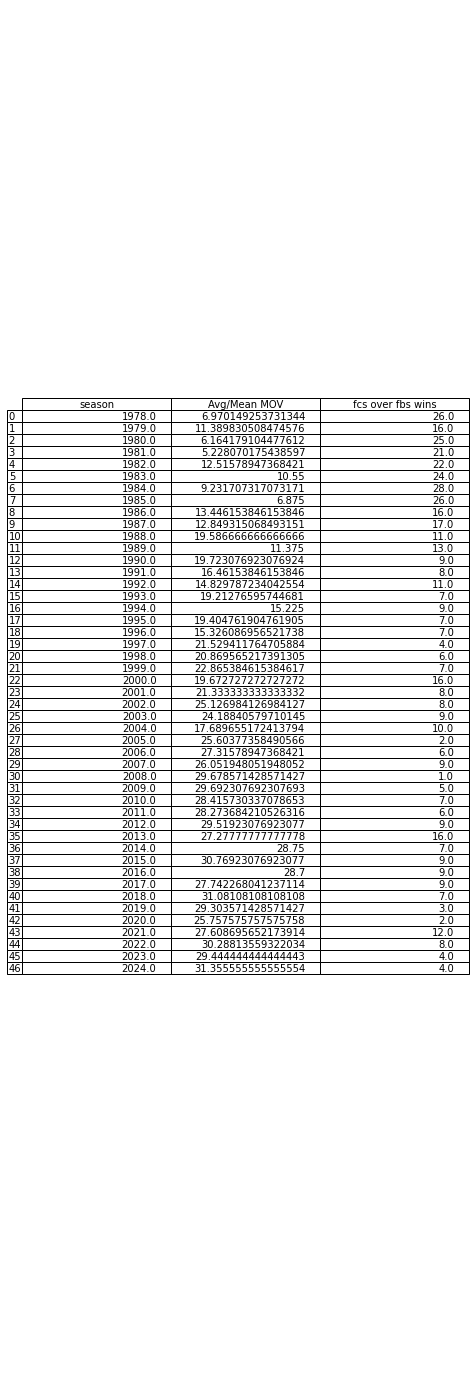

In [12]:


df=pd.DataFrame(arr,columns=['season','Avg/Mean MOV','fcs over fbs wins'])
import matplotlib.pyplot as plt
import pandas as pd


#my_frame Display pandas tablerrr
my_frame=df
fig = plt.figure(figsize = (8, 25))
ax = fig.add_subplot(111)

ax.table(cellText = my_frame.values,
          rowLabels = my_frame.index,
          colLabels = my_frame.columns,
          loc = "center"
         )


ax.axis("off");
df.to_html("newupdatedfcsvsfbs.html")

In [14]:
'Northwestern State' in fcsteams[1979]

True

In [ ]:
import requests
from bs4 import BeautifulSoup
arr=[]
urls={"2007":"https://www.teamrankings.com/college-football/ranking/predictive-by-other?date=2007-08-30","2008":"https://www.teamrankings.com/college-football/ranking/predictive-by-other?date=2008-08-28",'2009':"https://www.teamrankings.com/college-football/ranking/predictive-by-other?date=2009-09-03","2010":"https://www.teamrankings.com/college-football/ranking/predictive-by-other?date=2010-09-02","2011":"https://www.teamrankings.com/college-football/ranking/predictive-by-other?date=2011-09-01","2012":"https://www.teamrankings.com/college-football/ranking/predictive-by-other?date=2012-08-30"}
for url in urls:
    print(url)
    html=requests.get(urls[url]).text
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[0]
    for tr in table.find_all("tr"):
        if 'Rating' not in str(tr):
            team=tr.find_all("td")[1]
            team=team['data-sort']
            rating=tr.find_all("td")[2].text
            arr.append([team,rating,float(url)])
        

# get games

In [2]:
from2000.append([])

550

In [37]:
s=''
w=from2000[(from2000.home==s)|(from2000.away==s)]
w[w.season==2024]

,home,away,neutral,season,date,homep,awayp,venue1,homeclass,awayclass,hpen,apen,homeelopre,awayelopre,predt1spread,hd1,ad1,homeelopost,awayelopost
148880,Florida A&M,Norfolk State,True,2024.0,20240824.0,24.0,23.0,vs,NaN,NaN,0.0,0.0,1108.296156,721.040315,24.0,True,True,1109.727755,719.608716
149112,East Carolina,Norfolk State,False,2024.0,20240831.0,42.0,3.0,vs,NaN,NaN,0.0,0.0,1321.601562,719.608716,35.0,True,True,1269.796584,717.413693
149493,Norfolk State,Virginia St,False,2024.0,20240907.0,28.0,23.0,vs,NaN,d2,0.0,0.0,771.413693,594.239957,10.0,True,False,728.401375,583.252275
149922,Hampton,Norfolk State,False,2024.0,20240914.0,37.0,7.0,@,NaN,NaN,0.0,0.0,941.392473,782.401375,10.0,True,True,954.942025,714.851824
150289,Norfolk State,VMI,False,2024.0,20240921.0,32.0,10.0,@,NaN,NaN,0.0,0.0,714.851824,1006.524375,-18.0,True,True,770.037790,865.338408


In [5]:
iop

,home,away,neutral,season,date,homep,awayp,venue1,homeclass,awayclass,hpen,apen
0,Penn State,Temple,False,1978.0,19780901.0,10.0,7.0,@,NaN,NaN,NaN,NaN
14,South Carolina State,Virginia St,False,1978.0,19780902.0,47.0,0.0,vs,NaN,NaN,NaN,NaN
13,Richmond,Southern Mississippi,False,1978.0,19780902.0,7.0,10.0,vs,NaN,NaN,NaN,NaN
12,Northern Arizona,North Dakota State,False,1978.0,19780902.0,7.0,23.0,@,NaN,NaN,NaN,NaN
11,North Texas,UTEP,False,1978.0,19780902.0,49.0,0.0,vs,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
153618,Arkansas,Missouri,False,2024.0,20241130.0,0.0,0.0,@,NaN,NaN,NaN,NaN
153619,Maryland,Penn State,False,2024.0,20241130.0,0.0,0.0,@,NaN,NaN,NaN,NaN
153606,Arizona,Arizona State,False,2024.0,20241130.0,0.0,0.0,vs,NaN,NaN,NaN,NaN
153603,New Mexico State,UTEP,False,2024.0,20241130.0,0.0,0.0,vs,NaN,NaN,NaN,NaN


In [35]:
iop=iop.replace("Tennessee-Chattanooga","Chattanooga")
iop=iop.replace("Abilene Christian","Abilene")
iop=iop.replace("Abilene","Abilene Christian")
iop=iop.replace("California-Davis","UC Davis")
iopz=iop
iopz=iopz[iopz.season==2024] 
fcsmas=14
fbsmas=19
eloLeaguez.addPlayer("Anderson SC",rating=450)
eloLeaguez.addPlayer("Calvin",rating=450)
eloLeaguez.addPlayer("Centenary",rating=450)
eloLeaguez.addPlayer("Anderson SC",rating=450)
eloLeaguez.addPlayer("Andrew Col",rating=450)
eloLeaguez.addPlayer("Cent Georgia Tech",rating=450)
iopz=iopz[iopz.date>20240925]
iopz=iopz[iopz.date<20240929]
avg=(fbsmas+fcsmas+fbsfcsmas)/3
avg=round(avg)
for game in iopz.itertuples():
    
    
    if game.venue1=='vs':
        if game.home in fcsteams[game.season] or game.home in fbsteams[game.season]:
            
            hf=hfas[confs[game.season][game.home]]
        if game.home not in fcsteams[game.season] and game.home not in fbsteams[game.season]:
            hf=50
    if game.venue1=='@':
        if game.away in fcsteams[game.season] or game.away in fbsteams[game.season]:
            
            hf=hfas[confs[game.season][game.away]]
        if game.away not in fcsteams[game.season] and game.away not in fbsteams[game.season]:
            hf=50
    apen=0
    hpen=0
    if game.home in fbsteams[game.season] and game.away in fcsteams[game.season]:
        apen=fcs
    if game.away in fbsteams[game.season] and game.home in fcsteams[game.season]:
        hpen=fcs
    apen=0
    hpen=0
    if 'True' in str(game.neutral):
        hr=eloLeaguez.ratingDict[game.home]-hpen
        ar=eloLeaguez.ratingDict[game.away]-apen
    else:
        if game.venue1=='@':
            hr=eloLeaguez.ratingDict[game.home]-hpen
            ar=eloLeaguez.ratingDict[game.away]+hf-apen
        else:
            hr=eloLeaguez.ratingDict[game.home]+hf-hpen
            ar=eloLeaguez.ratingDict[game.away]-apen
    
    if(game.home in fcsteams[game.season] and game.away in fcsteams[game.season]):
        s=(fcsmas*(1-rev))+(avg*rev)
    if(game.home in fbsteams[game.season] and game.away in fbsteams[game.season]):
        s=(fbsmas*(1-rev))+(avg*rev)
    if(game.home in fbsteams[game.season] and game.away in fcsteams[game.season]) or(game.away in fbsteams[game.season] and game.home in fcsteams[game.season]):
        s=(fbsfcsmas*(1-rev))+(avg*rev)
    s=round(s)
    spread=(hr-ar)/s
    spread=round(spread)
    if hr>ar:
        if spread==0:
            spread=1
    if hr<ar:
        if spread==0:
            spread=-1
    if hr>ar:
        
        elod=hr-ar
        p1=10**(-elod/400)
        p2=1
        o=1/(p1+p2)
        
        iopz.at[game.Index,'homeprob']=round(100*o)
        iopz.at[game.Index,'awayprob']=round((100*o)-o)
        
        iopz.at[game.Index,'predhomewin']=True
    else:
        elod=ar-hr
        p1=10**(-elod/400)
        p2=1
        o=1/(p1+p2)
        
        iopz.at[game.Index,'awayprob']=round(100*o)
        iopz.at[game.Index,'homeprob']=round((100*o)-o)
        iopz.at[game.Index,'predhomewin']=False
    iopz.at[game.Index,'predhomespread']=spread
    if game.home in fbsteams[game.season] or game.away in fbsteams[game.season]:
  
        
        elod=ar-hr
        p1=10**(-elod/400)
        p2=1
        o=1/(p1+p2)
            
        iopz.at[game.Index,'awayprob']=round(100*o)
        iopz.at[game.Index,'homeprob']=round((100*o)-o)
        iopz.at[game.Index,'predhomewin']=False
HEADER = '\033[95m'
OKBLUE = '\033[94m'
OKCYAN = '\033[96m'
OKGREEN = '\033[92m'
WARNING = '\033[93m'
FAIL = '\033[91m'
ENDC = '\033[0m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'
sep=" "
OKCYAN="$$$$$ "

for game in iopz.itertuples():
    if (game.home in fbsteams[game.season] or game.home in fcsteams[game.season]):
        if game.home in swac or game.away in swac or game.home in meac or game.away in meac:
            n=""
            if 'True' in str(game.neutral):
                n=" @neutral location"
            if game.predhomespread>0:
                if game.venue1=='@':
                    thing=" on the road"
                else:
                    thing=" at home"
                if 'True' in str(game.neutral):
                    thing=" at a neutral site"
                print(OKCYAN+"On "+str(game.date)+sep+game.home+" beats "+game.away+""+thing+" and wins "+str(game.homeprob)+"% and wins by "+str(game.predhomespread)+ENDC)
            else:
                if game.venue1=='@':
                    thing=" at home"
                else:
                    thing=" on the road"
                if 'True' in str(game.neutral):
                    thing=" at a neutral site"
                print(OKCYAN+"On "+str(game.date)+sep+game.away+" beats "+game.home+""+thing+" and wins "+str(game.awayprob)+"% and wins by "+str(-game.predhomespread)+ENDC)
        else:
            n=""
            if 'True' in str(game.neutral):
                n=" @neutral location"
            if game.predhomespread>0:
                if game.venue1=='@':
                    thing=" on the road"
                else:
                    thing=" at home"
                if 'True' in str(game.neutral):
                    thing=" at a neutral site"
                print("On "+str(game.date)+sep+game.home+" beats "+game.away+""+thing+" and wins "+str(game.homeprob)+"% and wins by "+str(game.predhomespread))
            else:
                if game.venue1=='@':
                    thing=" at home"
                else:
                    thing=" on the road"
                if 'True' in str(game.neutral):
                    thing=" at a neutral site"
                print("On "+str(game.date)+sep+game.away+" beats "+game.home+""+thing+" and wins "+str(game.awayprob)+"% and wins by "+str(-game.predhomespread))

On 20240926.0 Army beats Temple on the road and wins 35.0% and wins by 6.0
On 20240927.0 Washington beats Rutgers on the road and wins 68.0% and wins by 7.0
On 20240927.0 Miami beats Virginia Tech at home and wins 34.0% and wins by 6.0
On 20240928.0 Central Arkansas beats Lamar at home and wins 91.0% and wins by 27.0
On 20240928.0 Tennessee State beats Charleston Southern at home and wins 52.0% and wins by 1.0
On 20240928.0 Kansas State beats Oklahoma State at home and wins 26.0% and wins by 9.0
On 20240928.0 Sacramento State beats Northern Arizona on the road and wins 64.0% and wins by 7.0
$$$$$ On 20240928.0 Alabama State beats Bethune-Cookman on the road and wins 65.0% and wins by 7.0
$$$$$ On 20240928.0 Campbell beats Delaware State at home and wins 96.0% and wins by 36.0
On 20240928.0 Boston College beats Western Kentucky at home and wins 37.0% and wins by 5.0
On 20240928.0 Mississippi beats Kentucky at home and wins 92.0% and wins by 23.0
On 20240928.0 Albany beats Maine at home 

In [34]:
avg

18.666666666666668

In [11]:
hfas[confs[2024]['Georgia']]

117

In [37]:
eloLeaguez.ratingDict['McNeese State']

KeyError: 'McNeese State'

In [35]:
(eloLeaguez.ratingDict['Miami']+hfas[confs[2024]['Miami']])-eloLeaguez.ratingDict['Florida A&M']

658.8455500106147

In [18]:
ht=input("home team")
at=input("away team")
n=input("neutral")
hr=eloLeaguez.ratingDict[ht]
if n==True or float(n)==1:
    hr=hr
else:
    hr+=hfas[confs[2024][ht]]


ar=eloLeaguez.ratingDict[at]

spread=(hr-ar)/17
spread=round(spread)
if spread==0:
    if hr>ar:
        spread=1
    else:
        spread=-1
print(ht+" by "+str(spread))

home team Howard
away team Hampton
neutral 1


Howard by -3


In [ ]:
import requests
from fake_useragent import UserAgent
html=requests.get("https://github.com/TheSpeedX/PROXY-List/raw/master/http.txt").text
soup=BeautifulSoup(html)
didp=0
proxies={}
proxies['http']={}
for line in html.split("\n"):
    if didp<10:
        print(line)
        didp+=1
        proxies['http']=line
from bs4 import BeautifulSoup
html=requests.get("https://www.versussportssimulator.com/CFB/simulations/Northwestern%20St-vs-Prairie%20View%20A&M",proxies=proxies)
print(html.status_code)
html=html.text
soup=BeautifulSoup(html)
for td in soup.find_all("td"):
    if 'Point Spread' in str(td) and 'FINAL SCORE' in str(td):
        print(td)

In [ ]:
this=iopz[iopz.season==2024]
winf={}
for team in set(fbsteams[2024]):
    winf[team]=0
for row in fbsteams[2024]:
    winf[row]=eloLeaguez.ratingDict[row]
    
    
        

In [ ]:
arr=[]
for i in range(2021,2024):
    print(i)
    html=requests.get("https://www.sportsoddshistory.com/cfb-win/?y="+str(i)+"&sa=cfb&t=win&o=t")
    print(html.status_code)
    html=html.text
    html=html.replace("\t","")
    html=html.replace("\n","")
    soup=BeautifulSoup(html)
    tables=soup.find_all("table")
    for table in tables:
        for tr in table.find_all("tr"):
            if 'Result' not in str(tr) and 'Historical' not in str(tr):
                td=tr.find_all("td")
                team=td[0].text
                team=team.strip()
                arr.append([team,td[1].text,td[2].text,td[3].text,td[4].text,td[5].text,i])
wldf=pd.DataFrame(arr,columns=['Team','WL','Over Odds','Under Odds','Actual','Result','Year'])
wldf=wldf.replace("Central Florida","UCF")
wldf=wldf.replace("Florida Atlantic","FL Atlantic")
wldf=wldf.replace("Middle Tennessee State","Middle Tennessee")
wldf=wldf.replace("Miami (FL)","Miami")
wldf=wldf.replace("Coastal Carolina","Coastal Car")
wldf=wldf.replace("Kennesaw State","Kennesaw")
wldf=wldf.replace("Texas San Antonio","UT San Antonio")
wldf=wldf.replace("UNLV","Nevada-Las Vegas")
wldf=wldf.replace("Louisiana Lafayette","Louisiana")
wldf=wldf.replace("Ole Miss","Mississippi")
wt={}
for i in range(2021,2025):
    wt[float(i)]={}
for row in wldf.itertuples():
    wt[float(row.Year)][str(row.Team)]=float(row.WL)

In [ ]:
msqez={}
for i in range(20,50):
    msqez[i]=[]
    msqez[i]=np.mean(msqe[str(i)])
sorted(msqez,key=msqez.get,reverse=False)[:1]

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
arr=[]
for i in range(2007,2024):
    print(i)
    url="http://www.bisonville.com/fanguide/fcspolls/polls"+str(i)+"00.html"
    html=requests.get(url).text
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[1]
    for tr in table.find_all("tr"):
        if 'td' in str(tr):
            for td in tr.find_all("td"):
                arr.append([td.text,i])

In [ ]:
from2000['neutral']=from2000['neutral'].fillna("False")
for row in from2000.itertuples():
    if '@' in str(row.neutral):
        from2000.at[row.Index,'neutral']='True'

# do standings stuff

In [ ]:
for row in from2000.itertuples():
    i=row.season
    if row.season not in done:
        print(row.season)
        done.append(row.season)
    if row.home in fbsteams[row.season]:
        from2000.at[row.Index,'homeclass']='FBS'
    if row.away in fbsteams[row.season]:
        from2000.at[row.Index,'awayclass']='FBS'
    if row.home in fcsteams[row.season]:
        from2000.at[row.Index,'homeclass']='FCS'
    if row.away in fcsteams[row.season]:
        from2000.at[row.Index,'awayclass']='FCS'
    if row.season>1994:
        homez=str(row.home).replace("'","")
        if row.home in standings['d2'][i]:
            from2000.at[row.Index,'homeclass']='D2'
        if row.home in standings['nccaa'][i]:
            from2000.at[row.Index,'homeclass']='NCCAA'
        if row.home in standings['naia'][i]:
            from2000.at[row.Index,'homeclass']='NAIA'
        if row.home in standings['d3'][i]:
            from2000.at[row.Index,'homeclass']='D3'
        if row.home in standings['usports'][i]:
            from2000.at[row.Index,'homeclass']='U-Sports'
        if row.home in standings['njcaa'][i]:
            from2000.at[row.Index,'homeclass']='NJCAA'
        if row.away in standings['mexico'][i]:
            from2000.at[row.Index,'awayclass']='Mexico'
        if row.home in standings['mexico'][i]:
            from2000.at[row.Index,'homeclass']='Mexico'
        if row.home in standings['cccaa'][i]:
            from2000.at[row.Index,'homeclass']='CCCAA'
        if row.home in standings['others'][i]:
            from2000.at[row.Index,'homeclass']='Others'
        if row.away in standings['d2'][i]:
            from2000.at[row.Index,'awayclass']='D2'
        if row.away in standings['nccaa'][i]:
            from2000.at[row.Index,'awayclass']='NCCAA'
        if row.away in standings['naia'][i]:
            from2000.at[row.Index,'awayclass']='NAIA'
        if row.away in standings['d3'][i]:
            from2000.at[row.Index,'awayclass']='D3'
        if row.away in standings['usports'][i]:
            from2000.at[row.Index,'awayclass']='U-Sports'
        if row.away in standings['njcaa'][i]:
            from2000.at[row.Index,'awayclass']='NJCAA'
        if row.away in standings['cccaa'][i]:
            from2000.at[row.Index,'awayclass']='CCCAA'
        if row.away in standings['others'][i]:
            from2000.at[row.Index,'awayclass']='Others'
    if row.season<1995:
        if row.home not in fbsteams[row.season] and row.home not in fcsteams[row.season]:
            from2000.at[row.Index,'homeclass']='nond1'
        if row.away not in fbsteams[row.season] and row.away not in fcsteams[row.season]:
            from2000.at[row.Index,'awayclass']='nond1'
arr={}
for key in standings.keys():
    for k in standings.keys():
        if k!=key:
            kz=k
            kz=kz.upper()
            key=key.upper()
            if key=='OTHERS':
                key='Others'
            if kz=='OTHERS':
                kz='Others'
            if key=='USPORTS':
                key='USports'
            if kz=='USPORTS':
                kz='USports'
            if kz=='MEXICO':
                kz='Mexico'
            if key=='MEXICO':
                kz='Mexico'
            name=key+'vs'+kz
            arr[name]=[]
            classdf=from2000[((from2000.homeclass==key)&(from2000.awayclass==kz))|((from2000.homeclass==kz)&(from2000.awayclass==key))]
            print(len(classdf))
            for row in classdf.itertuples():
                
                if row.homeclass==key and row.awayclass==kz:
                    arr[name].append(row.homep-row.awayp)
                if row.awayclass==key and row.homeclass==kz:
                    arr[name].append(row.awayp-row.homep)
arr['FCSvsnond1']=[20]
arr['nond1vsFCS']=[-20]
arr['FBSvsnond1']=[20]
arr['nond1vsFBS']=[-20]
for keyz in arr.keys():
    if len(arr[keyz])>0:
        arr[keyz]=round(np.mean(arr[keyz]))*25
    else:
        arr[keyz]=0

    
arrz={}

for key in standings.keys():
    if key!='fbs' and key!='fcs':
        print(key)
        arrz[key]=[]
        for game in from2000.itertuples():
            hc=game.homeclass
            hc=hc.lower()
            ac=game.awayclass
            ac=ac.lower()
            if hc=='u-sports':
                hc='usports'
            if ac=='u-sports':
                ac='usports'
            if hc==key and ac!=key:
                arrz[key].append(game.homep-game.awayp)
            if hc!=key and ac==key:
                arrz[key].append(game.awayp-game.homep)
for k in arrz:
    arrz[k]=np.mean(arrz[k])    

In [ ]:
tz={}
for team in fbsteams[2023]:
    tz[team]=0
for row in from2000.itertuples():
    if row.season==2023:
        if row.home in fbsteams[2023]:
            tz[row.home]+=1
        if row.away in fbsteams[2023]:
            tz[row.away]+=1
            
    

In [ ]:
urls={}
for i in range(1995,2024):
    print(i)
    url="https://masseyratings.com/scores.php?s=cf"+str(i)
    html=requests.get(url).text
    soup=BeautifulSoup(html)
    for a in soup.find_all("a"):
        if 'All' in str(a):
            urls[i]='https://masseyratings.com/'+a['href']
        

In [ ]:
rh={}
u=[]
for team in eloLeaguez.ratingDict.keys():
    rh[team]=(eloLeaguez.ratingDict[team])
    u.append(eloLeaguez.ratingDict[team])
rh=sorted(rh, key=rh.get, reverse=False)
i=1
didp=0
o=0
print(np.mean(u))
for key in rh:
    if '-' in str(eloLeaguez.ratingDict[key]):
        print(key)
for key in rh:
    if didp==0:
        print(str(i)+":"+key+"("+str(eloLeaguez.ratingDict[key]-np.mean(u))+")")
        didp=1
    i+=1

In [ ]:
h=[]
for i in range(1978,2024):
    for t in fbsteams[i]:
        h.append(t)
    for t in fcsteams[i]:
        h.append(t)

In [ ]:
arr=[]
for game in from2000.itertuples():
    if 'False' in str(game.neutral):
        if game.venue1=='vs':
            if game.home in fcsteams[game.season] and game.away in fcsteams[game.season]:
                arr.append(game.homep-game.awayp)
        if game.venue1=='@':
            if game.home in fcsteams[game.season] and game.away in fcsteams[game.season]:
                arr.append(game.awayp-game.homep)
print(np.mean(arr))

In [8]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
for key in preds:
    print((color.BOLD+preds[key]+color.END))

On 20230826.0 Jackson State beats South Carolina State by 16
On 20230831.0 Tulsa beats Arkansas-Pine Bluff by 44
On 20230901.0 Eastern Michigan beats Howard by 38
On 20230902.0 Charlotte beats South Carolina State by 26
On 20230902.0 Southern Mississippi beats Alcorn State by 30
On 20230902.0 Hampton beats Grambling by 10
On 20230902.0 Norfolk State beats Virginia St by 19
On 20230902.0 Mississippi Valley State beats Central St OH by 26
On 20230902.0 Texas Southern beats Prairie View by 2
On 20230902.0 Southern beats Alabama State by 1
On 20230902.0 Richmond beats Morgan State by 34
On 20230902.0 NC Central beats W Salem St by 38
On 20230902.0 Memphis beats Bethune-Cookman by 48
On 20230902.0 Delaware State beats Bowie St by 15
On 20230902.0 Vanderbilt beats Alabama A&M by 47
On 20230903.0 Jackson State beats Florida A&M by 4
On 20230909.0 Toledo beats Texas Southern by 41
On 20230909.0 Tennessee State beats Arkansas-Pine Bluff by 10
On 20230909.0 LSU beats Grambling by 64
On 20230909.

In [12]:
'Tennessee State' in fbsteams[1980]

False

# scrape fcs

In [ ]:
arr=[]
arrz=[]
import pandas as pd
import requests
from bs4 import BeautifulSoup
html=requests.get("https://ontheroadtovote.com/ncaaf/fcs/index.php")
soup=BeautifulSoup(html.text)
links=soup.find_all("a")
for a in links:
  
    url='https://ontheroadtovote.com/ncaaf/fcs/'+a['href']
    
    if '.txt' in str(a) and 'teams' not in str(a):
        df=pd.read_csv(url)
        df=df.replace("Eastern Washngton","Eastern Washington")
        df=df.replace("Nofrolk State",'Norfolk State')
        for row in df.itertuples():
            
                
            if 'Year' in str(row):
                s=row.Year 
            if 'Season' in str(row):
                s=row.Season
            if 'season' in str(row):
                s=row.season
            if 'netural' in str(row):
                n=row.netural
            if 'neutral' in str(row):
                n=row.neutral
            schl=str(row.Schl)
            opp=str(row.Opp)
            didf=0
            if 'for' in schl:
                schl=schl.split("(")
                schl=schl[0]
                if row.PTS==1 and row.OPP==0:
                    didf=1
                if row.PTS==0 and row.OPP==1:
                    didf=1
            if 'for' in opp:
                opp=opp.split("(")
                opp=opp[0]
                if row.PTS==1 and row.OPP==0:
                    didf=1
                if row.PTS==0 and row.OPP==1:
                    didf=1
            if float(s)<1995:
                na=row.Opp+row.Schl+row.Date+str(row.OPP)+str(row.PTS)
            
                if 1==1:
                    o=row.Opp
                    if float(s)<1990:
                        if o=='Maryland Eastern Shore':
                            o='Maryland-Eastern Shore'
                        if o=='NC Central':
                            o='North Carolina Central'
                    if '(fo' in str(schl):
                        schl=schl.split("(f")[0]
                        schl=schl.strip()
                    if '(fo' in str(o):
                        o=o.split("(f")[0]
                        o=o.strip()
                    arrz.append(row.Schl+o+row.Date+str(row.PTS)+str(row.OPP))
                    arr.append([schl,o,row.Venue,row.PTS,row.OPP,row.Date,s,n])
                        
        
df=pd.concat([pd.DataFrame(arr)])
df.columns=['Schl','Opp','Venue','PTS',"OPP",'date','Season','neutral']
df=df[df.Season<1995]
df.sort_values(by='date') 


# verify fcs scores****

In [ ]:
count=0
df['Schl']=df['Schl'].str.replace("Bethune Cookman","Bethune-Cookman")
df['Opp']=df['Opp'].str.replace("Bethune Cookman","Bethune-Cookman")
teams={}
for i in range(1978,1995):
    teams[i]=[]
for row in df.itertuples():
    teams[float(row.Season)].append(row.Schl)
arrz=[]
for row in df.itertuples():
    if row.Schl in teams[float(row.Season)] and row.Opp in teams[float(row.Season)]:
        arrz.append([row.Schl,row.Opp,row.Venue,row.PTS,row.OPP,row.date,row.Season,row.neutral])

    
dfz=pd.DataFrame(arrz)
dfz.columns=['Schl','Opp','Venue','PTS',"OPP",'date','Season','neutral']
sums={}
dfz=dfz.sort_values(by='date')
dates=set(dfz.date.tolist())
names={}
for row in dfz.itertuples():
    if row.neutral==False:
        if row.Venue=='vs':
            
            name=row.date+row.Schl+row.Opp+row.Venue+str(row.PTS)+str(row.OPP)+str(row.Season)+str(row.neutral)
            if name not in names:
                names[name]=0
            names[name]+=1
        else:
            name=row.date+row.Opp+row.Schl+'vs'+str(row.OPP)+str(row.PTS)+str(row.Season)+str(row.neutral)
            if name not in names:
                names[name]=0
            names[name]+=1
    
for date in dates:
    i=date
    sums[i]={}
    
    sums[i]['p']=0
    sums[i]['o']=0
for date in dates:
    j=dfz[dfz.date==date]
    sums[date]['p']=sum(j['PTS'])
    sums[date]['o']=sum(j['OPP'])
for s in sums:
    if sums[s]['p']!=sums[s]['o']:
        w=dfz[dfz.date==s]
        did={}
        didz={}
        for row in w.itertuples():
            s=row.Schl
            o=row.Opp
            if '(fo' in str(s):
                s=s.split("(f")[0]
                s=s.strip()
            if '(fo' in str(o):
                o=o.split("(f")[0]
                o=o.strip()
            did[s]=0
            didz[o]=0
        for row in w.itertuples():
            
            s=row.Schl
            o=row.Opp
            if '(fo' in str(s):
                s=s.split("(f")[0]
                s=s.strip()
            if '(fo' in str(o):
                o=o.split("(f")[0]
                o=o.strip()
            did[s]+=row.PTS
            didz[o]+=row.OPP
        at=0
        v=0
        for row in w.itertuples():
            
            if 'False' in str(row.neutral):
                if row.Venue=='vs':
                    v+=1
                else:
                    at+=1
            if row.Season<1986 and 'Morgan State' in str(row):
                m=1
            else:
                
                s=row.Schl
                o=row.Opp
                if '(fo' in str(s):
                    s=s.split("(f")[0]
                    s=s.strip()
                if '(fo' in str(o):
                    o=o.split("(f")[0]
                    o=o.strip()
                if did[s]!=didz[s]:
                    print(row)
        if row.Season<1986 and 'Morgan State' in set(w.Schl.tolist()+w.Opp.tolist()):
            m=1
        else:
            if at!=v:
                print(row.date)

In [ ]:

ns=0
e=dfz[dfz.Season==1986]
for row in e.itertuples():
    if 'True' in str(row):
        print(row.date+"||"+row.Schl+"||"+row.Opp+"||"+str(row.neutral))
        ns+=1
print("neutral games"+": "+str(ns))

get rankings

In [ ]:
msqee={}
for key in range(5,51):
    msqee[i]=0
for i in range(5,51):
    msqee[i]=np.mean(msqe[i])
mas=min(msqee, key=msqee.get)
mas

# **get scores**

In [ ]:
import re

import pandas as pd
import requests
from bs4 import BeautifulSoup
from bs4 import BeautifulSoup as bs
tds={}
d3urls={"2024":"https://masseyratings.com/scores.php?s=587076&sub=587076&all=1&mode=3&sch=on&format=0"}
gz=[]
for key in d3urls:
    gg=[]
    r = requests.get(d3urls[key])
    soup = bs(r.content, 'lxml')
    p = re.compile(r'([^0-9-]+)\s{3,}')
    p2 = re.compile(r'\s(\d+)\s')
    aa=str(bs(r.content, 'lxml'))
    q=aa
    q=q.split("\n")
    for line in q:
        
        
        
        
        line=str(line)
        
        
        
        line = list(line.split(', '))
        if "<" not in str(line):
            
            date=str(line[0])
            datey=date.split(",")
            date=datey[1]
            row=[datey[1],line[1],line[2],line[3],line[4],line[5],line[6],float(key)]
            gg.append(row)
        if "<p>" in str(line):
            line=str(line)
            line=line.split("<p>")
            line=line[1]
            line=list(line.split(', '))
            date=str(line[0])
            datey=date.split(",")
            date=datey[1]
            date=date.replace("'","")
            
            row=[datey[1],line[1],line[2],line[3],line[4],line[5],line[6],float(key)]
            gg.append(row)
    d2=pd.DataFrame(gg,columns=['Date','Schl','venue1','PTS','Opp','venue2','OPP','Year'])
    
    nof=d3urls[key]
    nof=str(nof)
    nof=nof.split("&format=")
    nof=nof[0]
    nof=nof+"&format=2"
    htmlz=requests.get(nof).text
    soupz=BeautifulSoup(htmlz)
    tds={}
    d2.reset_index(inplace=True)
    d2 = d2.astype({"Schl": str, "Opp": str})
    d2=d2.astype("string")
    d2['Schl']=d2['Schl'].str.replace("'","")
    d2['Opp']=d2['Opp'].str.replace("'","")
    d2['PTS']=d2['PTS'].str.replace("'","")
    d2['OPP']=d2['OPP'].str.replace("'","")
    d2['venue1']=d2['venue1'].str.replace("'","")
    d2['venue2']=d2['venue2'].str.replace("'","")
    for line in soupz.text.split('\n')[:-1]:
        k=str(line)
        k=k.replace(" ","")
        k=k.split(",")
  
        tds[float(k[0])]=k[1]
    for row in d2.itertuples():
        schl=str(row.Schl)
        schl=schl.replace(" ","")
        schl=float(schl)
        d2.at[row.Index,"Schl"]=tds[schl]
        o=str(row.Opp)
        o=o.replace(" ","")
        o=float(o)
        d2.at[row.Index,"Opp"]=tds[o]
    for row in d2.itertuples():
        OPP=str(row.OPP)
        OPP=OPP.replace("]","")
        OPP=float(OPP)
        gz.append([row.Date,row.Schl,row.venue1,row.PTS,row.Opp,OPP,row.Year])
    print(key)
d2=pd.DataFrame(gz,columns=['Date', 'Schl', 'venue1', 'PTS', 'Opp', 'OPP',
       'Year'])
d2.reset_index(inplace=True)
d2=d2.astype('string')
d2['Date']=d2['Date'].str.replace("'","")
d2['venue1']=d2['venue1'].replace(" 0","vs")
d2['venue1']=d2['venue1'].replace(" 1","vs")
d2['venue1']=d2['venue1'].replace("-1","@")
d2=d2.rename(columns={'venue2':'neutral','venue1':'Venue'})

In [ ]:
date

In [ ]:

df

In [ ]:
df=pd.read_csv("https://ontheroadtovote.com/ncaaf/prefbs/updatedwithnotes.txt")
arr=[]
for row in df.itertuples():
    opp=row.Opp
    opp=opp.replace("@","")
    s=row.Schl
    s=s.replace("@","")
    if s in fbsteams[row.Year] or opp in fbsteams[row.Year]:
        m=1
    else:
        arr.append([row.Schl,row.Opp,row.PTS,row.OPP,row.Year,row.neutral,row.Date,row.Notes])
    

In [ ]:
df=pd.DataFrame(arr,columns=['Schl','Opp','PTS',"OPP",'Year','neutral','Date','Notes'])
df.to_csv("uptodatenotes.txt")

# get standings

In [ ]:
import requests
ss={}

for i in range(1978,2024):
    ss[i]=[]
import re
def removing_leading_whitespaces(text):
     return re.sub(r"^\s+","",text)
arr=[]
import time
for y in range(1978,2024):
    print(y)
    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}
    html=requests.get("https://www.sports-reference.com/cfb/years/"+str(y)+"-standings.html",timeout=3,headers=headers)
    print(html.status_code)
    html=html.text
    soup=BeautifulSoup(html)
    
    for table in soup.find_all("table"):
        for team in table.find_all("td",{"data-stat":"school_name"}):
            team=team.text
            ss[y].append(team)
            arr.append([team,str(y)])

# scrape naia standings

In [ ]:
parkinsons disease predictor